In [ ]:
Name : Jeeva K
Intern ID : ML01006

# Prediction of Approval of Consumer Personal Loans Applications using different Machine Learning Algorithms.

# Importing All Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
data = pd.read_csv("project2-data.csv")
data.head()

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,Prev_ID,AGT_ID,CPL_Status
0,CPL001002,M,N,Austin,Pennycook,apennycook1@mac.com,007 Miller Road,0,Grad,N,7018.8,0.0,NaN,360.0,1.0,Urban,9694176212,92-247-0058,Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...,Y
1,CPL001003,M,Y,Mareah,Tomanek,mtomanek2@bloomberg.com,145 Charing Cross Junction,1,Grad,N,5499.6,1809.6,153.6,360.0,1.0,Rural,152387684,36-236-3028,Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...,N
2,CPL001005,M,Y,Myrna,Rosenthaler,mrosenthaler3@dmoz.org,268 Algoma Hill,0,Grad,Y,3600.0,0.0,79.2,360.0,1.0,Urban,6510396556,34-339-0917,Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...,Y
3,CPL001006,M,Y,Danyette,Stempe,dstempe4@tumblr.com,571 Stone Corner Park,0,Non Grad,N,3099.6,2829.6,144.0,360.0,1.0,Urban,7141853006,94-098-8902,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...,Y
4,CPL001008,M,N,Patten,McCathy,pmccathy5@ted.com,118 Moulton Drive,0,Grad,N,7200.0,0.0,169.2,360.0,1.0,Urban,23293411,38-247-1410,Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKi...,Y


In [3]:
data.tail()

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,Prev_ID,AGT_ID,CPL_Status
609,CPL002978,F,N,Farlay,Stoakes,fstoakeso6@multiply.com,7 Dixon Point,0,Grad,N,3480.0,0.0,71.0,360.0,1.0,Rural,7970371132,71-281-1408,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.8...,Y
610,CPL002979,M,Y,Nestor,Saben,nsabeno8@google.es,7590 Almo Crossing,3+,Grad,N,4927.2,0.0,40.0,180.0,1.0,Rural,5389023404,94-349-9755,Mozilla/5.0 (Windows NT 6.0; WOW64; rv:24.0) G...,Y
611,CPL002983,M,Y,Stanleigh,Le Fevre,slefevreo9@biblegateway.com,532 Hoepker Street,1,Grad,N,9686.4,288.0,253.0,360.0,1.0,Urban,5977024495,70-685-8094,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Y
612,CPL002984,M,Y,Amalle,Whitmell,awhitmelloa@ftc.gov,6417 Gerald Alley,2,Grad,N,9099.6,0.0,187.0,360.0,1.0,Urban,3077859882,09-770-7899,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Y
613,CPL002990,F,N,Gilly,Gauchier,ggauchierob@artisteer.com,37 Ruskin Crossing,0,Grad,Y,5499.6,0.0,133.0,360.0,0.0,Semi U,5248569311,58-618-0693,Mozilla/5.0 (Windows; U; Windows NT 5.1; ru-RU...,N


# Data Preprocessing Techniques

    Missing values
    Data Cleaning
    Extract Features
    Feature Encoding
    Label Encoding
    Handle Outliers
    Separate Independent and dependent Features
    then Select best Feature

# Data Exploration

    Data exploration is a key aspect of data analysis and model building. Without spending significant time 
    on understanding the data and its patterns one cannot expect to build efficient predictive models. Data
    exploration takes major chunk of time in a data science project comprising of data cleaning and 
    preprocessing

# Missing values

In [4]:
data.isnull().sum()

Loanapp_ID         0
Sex               13
Marital_Status     3
first_name         0
last_name          0
email              0
address            0
Dependents        15
Qual_var           0
SE                32
App_Income_1       0
App_Income_2       0
CPL_Amount         2
CPL_Term          14
Credit_His        50
Prop_Area          0
INT_ID             0
Prev_ID            0
AGT_ID             0
CPL_Status         0
dtype: int64

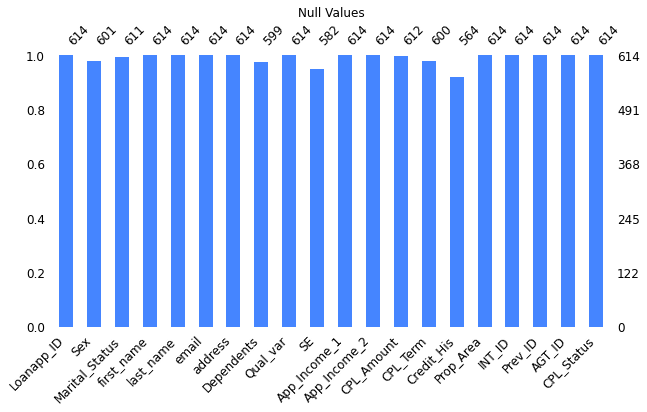

In [5]:
import missingno as no
no.bar(data,figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0))
plt.title("Null Values")
plt.show()

# Full summary of the dataframe

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loanapp_ID      614 non-null    object 
 1   Sex             601 non-null    object 
 2   Marital_Status  611 non-null    object 
 3   first_name      614 non-null    object 
 4   last_name       614 non-null    object 
 5   email           614 non-null    object 
 6   address         614 non-null    object 
 7   Dependents      599 non-null    object 
 8   Qual_var        614 non-null    object 
 9   SE              582 non-null    object 
 10  App_Income_1    614 non-null    float64
 11  App_Income_2    614 non-null    float64
 12  CPL_Amount      612 non-null    float64
 13  CPL_Term        600 non-null    float64
 14  Credit_His      564 non-null    float64
 15  Prop_Area       614 non-null    object 
 16  INT_ID          614 non-null    int64  
 17  Prev_ID         614 non-null    obj

# Statistical details of the dataset

In [7]:
data.describe()

,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,INT_ID
count,614.000000,614.000000,612.000000,600.00000,564.000000,6.140000e+02
mean,6484.151140,1945.494958,175.805882,342.00000,0.842199,5.055666e+09
std,7330.850008,3511.498043,102.606123,65.12041,0.364878,2.890445e+09
min,180.000000,0.000000,10.800000,12.00000,0.000000,1.788664e+07
25%,3453.000000,0.000000,120.000000,360.00000,1.000000,2.561243e+09
50%,4575.000000,1426.200000,153.600000,360.00000,1.000000,5.244783e+09
75%,6954.000000,2756.700000,200.700000,360.00000,1.000000,7.495052e+09
max,97200.000000,50000.400000,840.000000,480.00000,1.000000,9.989158e+09


# Shape of dataset

In [8]:
data.shape

(614, 20)

# Find the dtypes in the Dataset

In [9]:
data.dtypes

Loanapp_ID         object
Sex                object
Marital_Status     object
first_name         object
last_name          object
email              object
address            object
Dependents         object
Qual_var           object
SE                 object
App_Income_1      float64
App_Income_2      float64
CPL_Amount        float64
CPL_Term          float64
Credit_His        float64
Prop_Area          object
INT_ID              int64
Prev_ID            object
AGT_ID             object
CPL_Status         object
dtype: object

# Finding all the column names inside the dataset

In [10]:
data.columns

Index(['Loanapp_ID', 'Sex', 'Marital_Status', 'first_name', 'last_name',
       'email', 'address', 'Dependents', 'Qual_var', 'SE', 'App_Income_1',
       'App_Income_2', 'CPL_Amount', 'CPL_Term', 'Credit_His', 'Prop_Area',
       'INT_ID', 'Prev_ID', 'AGT_ID', 'CPL_Status'],
      dtype='object')

# Function return Series with number of distinct observations over requested axis

In [11]:
data.nunique()

Loanapp_ID        614
Sex                 2
Marital_Status      2
first_name        593
last_name         610
email             614
address           614
Dependents          4
Qual_var            2
SE                  2
App_Income_1      505
App_Income_2      287
CPL_Amount        219
CPL_Term           10
Credit_His          2
Prop_Area           3
INT_ID            614
Prev_ID           614
AGT_ID            353
CPL_Status          2
dtype: int64

# Change datatype after reading the csv

In [12]:
data['App_Income_1']=data['App_Income_1'].astype(float)
data['App_Income_2']=data['App_Income_2'].astype(float)

In [13]:
data['App_Income_1'].dtype

dtype('float64')

In [14]:
data['CPL_Amount'].fillna(data['CPL_Amount'].mean(),inplace=True)
data['CPL_Term'].fillna(data['CPL_Term'].mean(),inplace=True)
data['Credit_His'].fillna(data['Credit_His'].mean(),inplace=True)

In [15]:
data['CPL_Amount']=data['CPL_Amount'].astype(float)
data['CPL_Term']=data['CPL_Term'].astype(float)
data['Credit_His']=data['Credit_His'].astype(float)

In [16]:
data['Dependents'] = data['Dependents'].str.replace('+', '')
data['Dependents'].fillna('4',inplace=True)
data['Dependents']=data['Dependents'].astype(float)

In [17]:
data['Dependents'].unique()

array([0., 1., 2., 3., 4.])

In [18]:
data.dtypes

Loanapp_ID         object
Sex                object
Marital_Status     object
first_name         object
last_name          object
email              object
address            object
Dependents        float64
Qual_var           object
SE                 object
App_Income_1      float64
App_Income_2      float64
CPL_Amount        float64
CPL_Term          float64
Credit_His        float64
Prop_Area          object
INT_ID              int64
Prev_ID            object
AGT_ID             object
CPL_Status         object
dtype: object

# Find the correlation of dataset

In [21]:
data.corr()

,Dependents,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,INT_ID
Dependents,1.000000,0.103416,0.011146,0.116662,-0.073683,-0.077539,-0.067387
App_Income_1,0.103416,1.000000,-0.116605,0.023082,-0.045242,-0.014477,0.067286
App_Income_2,0.011146,-0.116605,1.000000,0.095048,-0.059675,-0.001665,-0.012481
CPL_Amount,0.116662,0.023082,0.095048,1.000000,-0.006772,0.004199,-0.026558
CPL_Term,-0.073683,-0.045242,-0.059675,-0.006772,1.000000,0.001395,-0.019232
Credit_His,-0.077539,-0.014477,-0.001665,0.004199,0.001395,1.000000,-0.013398
INT_ID,-0.067387,0.067286,-0.012481,-0.026558,-0.019232,-0.013398,1.000000


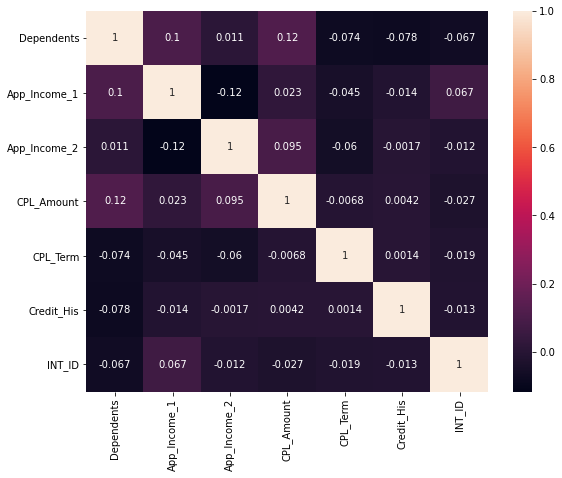

In [20]:
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

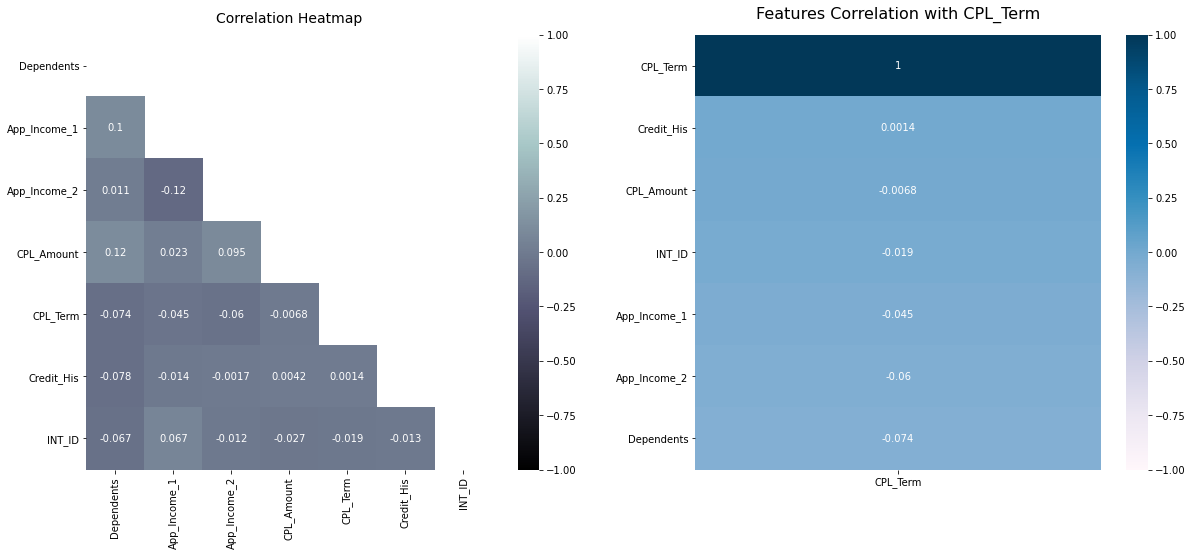

In [24]:
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
resign_corr = data.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1,annot=True,ax=ax[0],cmap='bone')
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);
heatmap = sns.heatmap(resign_corr[['CPL_Term']].sort_values(by='CPL_Term',ascending=False),vmin=-1, vmax=1, annot=True,ax=ax[1],cmap='PuBu')
heatmap.set_title('Features Correlation with CPL_Term', fontdict={'fontsize':16}, pad=16);

# Find the covariance of dataset

In [25]:
data.cov()

,Dependents,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,INT_ID
Dependents,1.255589e+00,8.495052e+02,4.385681e+01,1.339112e+01,-5.314845e+00,-3.038191e-02,-2.182557e+08
App_Income_1,8.495052e+02,5.374136e+07,-3.001666e+06,1.733339e+04,-2.134984e+04,-3.711031e+01,1.425761e+12
App_Income_2,4.385681e+01,-3.001666e+06,1.233062e+07,3.419012e+04,-1.348924e+04,-2.043893e+00,-1.266776e+11
CPL_Amount,1.339112e+01,1.733339e+04,3.419012e+04,1.049367e+04,-4.465783e+01,1.504062e-01,-7.863674e+09
CPL_Term,-5.314845e+00,-2.134984e+04,-1.348924e+04,-4.465783e+01,4.143817e+03,3.141161e-02,-3.578335e+09
Credit_His,-3.038191e-02,-3.711031e+01,-2.043893e+00,1.504062e-01,3.141161e-02,1.222768e-01,-1.354197e+07
INT_ID,-2.182557e+08,1.425761e+12,-1.266776e+11,-7.863674e+09,-3.578335e+09,-1.354197e+07,8.354670e+18


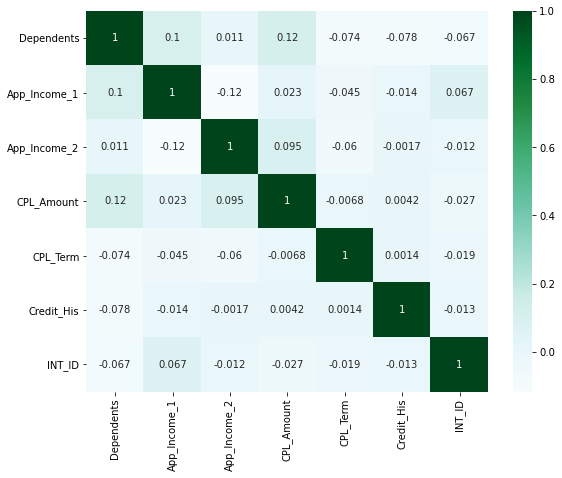

In [26]:
plt.figure(figsize=(9,7))
sns.heatmap(data.corr(),annot=True,cmap='BuGn')
plt.show()

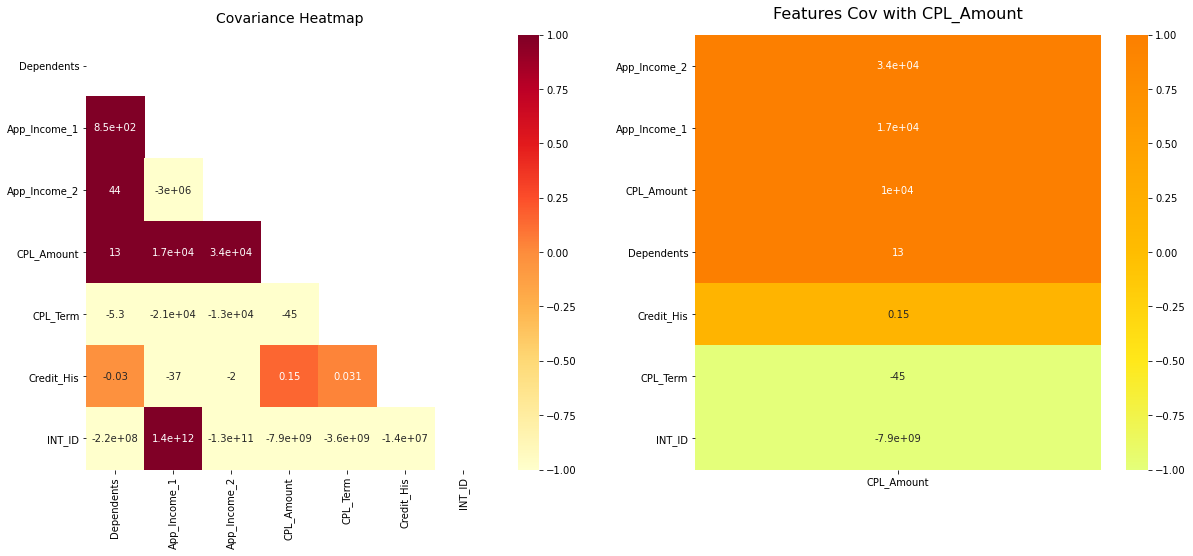

In [27]:
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
resign_cov = data.cov()
mask = np.triu(np.ones_like(resign_cov, dtype=np.bool))
cat_heatmap = sns.heatmap(data.cov(), mask=mask, vmin=-1, vmax=1,annot=True,ax=ax[0],cmap='YlOrRd')
cat_heatmap.set_title('Covariance Heatmap', fontdict={'fontsize':14}, pad=12);
heatmap = sns.heatmap(resign_cov[['CPL_Amount']].sort_values(by='CPL_Amount',ascending=False),vmin=-1, vmax=1, annot=True,ax=ax[1],cmap='Wistia')
heatmap.set_title('Features Cov with CPL_Amount', fontdict={'fontsize':16}, pad=16);

# Pie Chart

In [19]:
data['Sex'].value_counts()

M    489
F    112
Name: Sex, dtype: int64

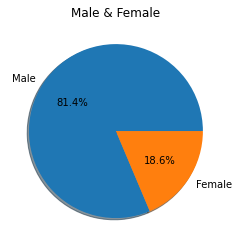

In [20]:
plt.pie(x=data['Sex'].value_counts(),
        labels=['Male','Female'],shadow=True,autopct='%1.1f%%')
plt.title('Male & Female')
plt.show()

In [21]:
data['Prop_Area'].value_counts()

Semi U    233
Urban     202
Rural     179
Name: Prop_Area, dtype: int64

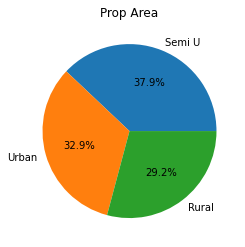

In [22]:
plt.pie(x=data['Prop_Area'].value_counts(),labels = ['Semi U','Urban','Rural'],rotatelabels=False,autopct='%1.1f%%',radius=1.0)
plt.title('Prop Area')
plt.show()

In [23]:
data['Qual_var'].value_counts()

Grad        480
Non Grad    134
Name: Qual_var, dtype: int64

In [24]:
explode = (0, 0.1)

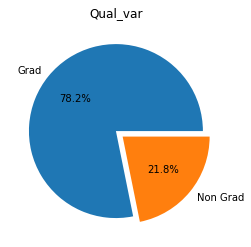

In [25]:
plt.pie(x=data['Qual_var'].value_counts(),labels = ['Grad','Non Grad'],rotatelabels=False,autopct='%1.1f%%',radius=1.0,explode=explode)
plt.title('Qual_var')
plt.show()

In [26]:
data['SE'].value_counts()

N    500
Y     82
Name: SE, dtype: int64

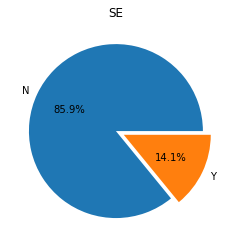

In [27]:
plt.pie(x=data['SE'].value_counts(),labels = ['N','Y'],rotatelabels=False,autopct='%1.1f%%',radius=1.0,explode=explode)
plt.title('SE')
plt.show()

In [28]:
data['CPL_Status'].value_counts()

Y    422
N    192
Name: CPL_Status, dtype: int64

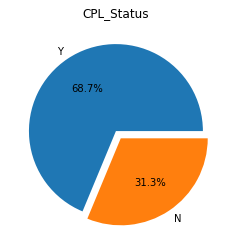

In [29]:
plt.pie(x=data['CPL_Status'].value_counts(),labels = ['Y','N'],
        rotatelabels=False,autopct='%1.1f%%',radius=1.0,explode=explode)
plt.title('CPL_Status')
plt.show()

# Bar Plot

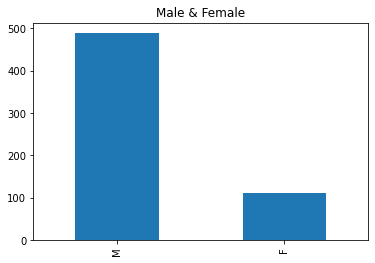

In [30]:
x=data['Sex'].value_counts()
x.plot.bar()
plt.title('Male & Female')
plt.show()

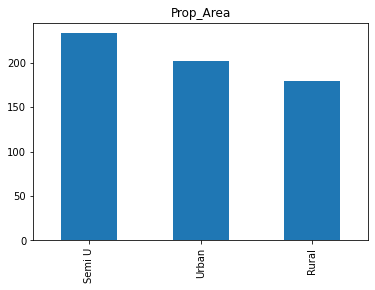

In [31]:
x=data['Prop_Area'].value_counts()
x.plot.bar()
plt.title('Prop_Area')
plt.show()

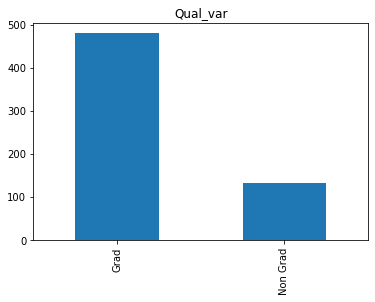

In [32]:
x=data['Qual_var'].value_counts()
x.plot.bar()
plt.title('Qual_var')
plt.show()

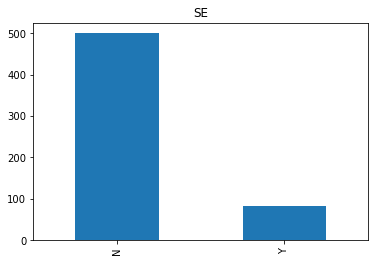

In [33]:
x=data['SE'].value_counts()
x.plot.bar()
plt.title('SE')
plt.show()

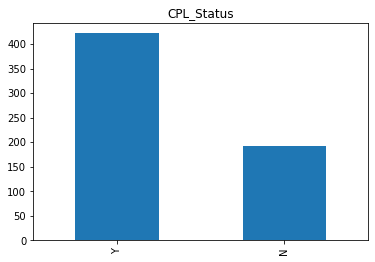

In [34]:
x=data['CPL_Status'].value_counts()
x.plot.bar()
plt.title('CPL_Status')
plt.show()

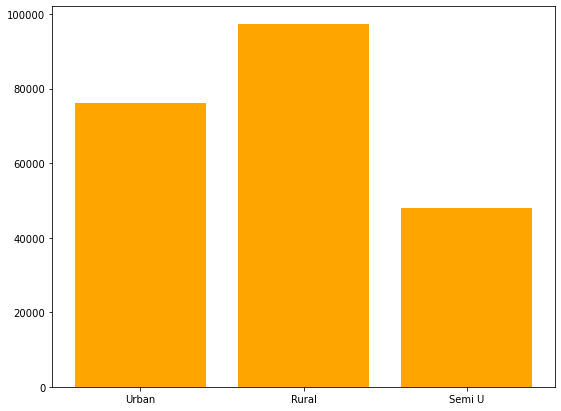

In [35]:
plt.figure(figsize=(9,7))
plt.bar('Prop_Area','App_Income_1', data=data,color='orange')
plt.show()

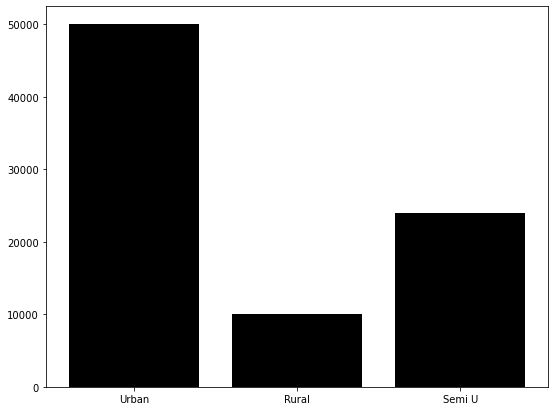

In [36]:
plt.figure(figsize=(9,7))
plt.bar('Prop_Area','App_Income_2', data=data,color='black')
plt.show()

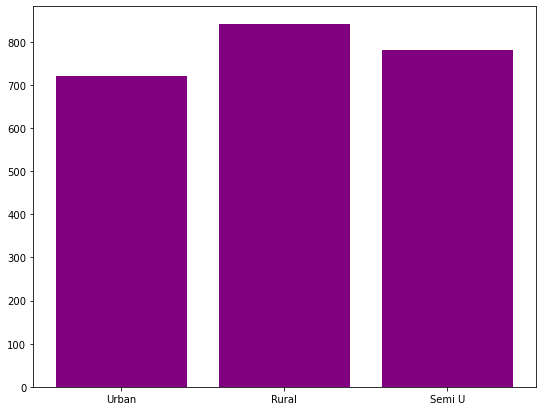

In [37]:
plt.figure(figsize=(9,7))
plt.bar('Prop_Area','CPL_Amount', data=data,color='purple')
plt.show()

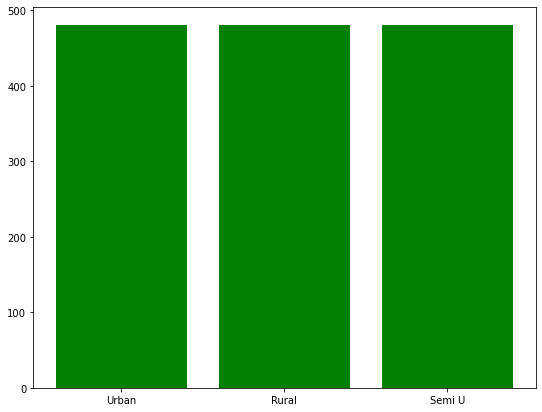

In [38]:
plt.figure(figsize=(9,7))
plt.bar('Prop_Area','CPL_Term', data=data,color='green')
plt.show()

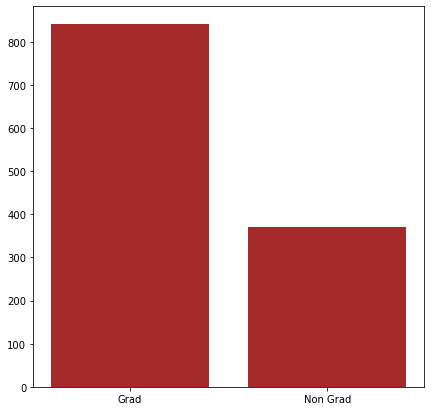

In [39]:
plt.figure(figsize=(7,7))
plt.bar('Qual_var','CPL_Amount', data=data,color='brown')
plt.show()

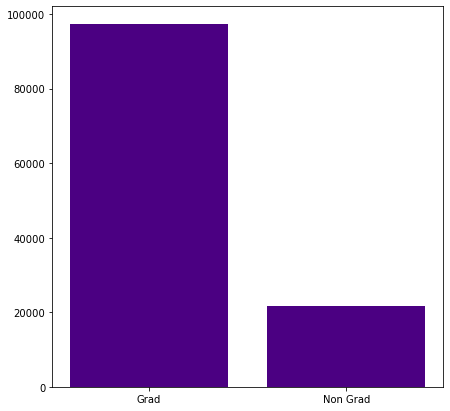

In [40]:
plt.figure(figsize=(7,7))
plt.bar('Qual_var','App_Income_1', data=data,color='indigo')
plt.show()

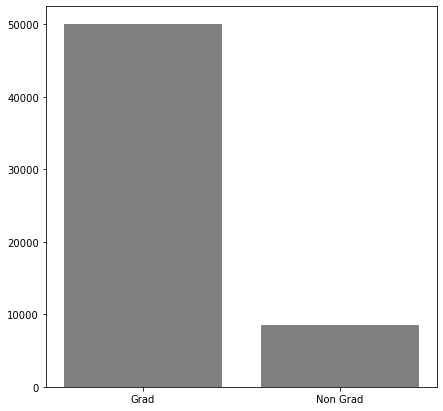

In [41]:
plt.figure(figsize=(7,7))
plt.bar('Qual_var','App_Income_2', data=data,color='grey')
plt.show()

# Count plot

Semi U    233
Urban     202
Rural     179
Name: Prop_Area, dtype: int64


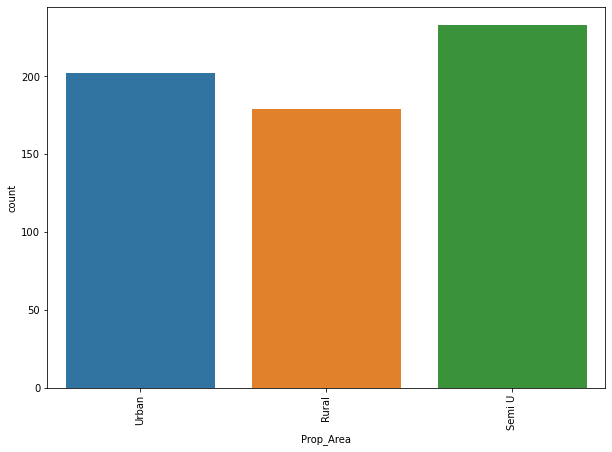

In [42]:
print(data['Prop_Area'].value_counts())
plt.figure(figsize=(10,7))
sns.countplot(x=data['Prop_Area'])
plt.xticks(rotation=90)
plt.show()

M    489
F    112
Name: Sex, dtype: int64


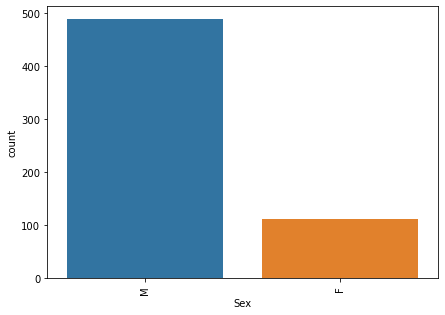

In [43]:
print(data['Sex'].value_counts())
plt.figure(figsize=(7,5))
sns.countplot(x=data['Sex'])
plt.xticks(rotation=90)
plt.show()

Grad        480
Non Grad    134
Name: Qual_var, dtype: int64


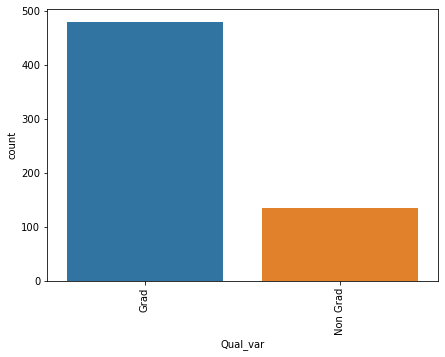

In [44]:
print(data['Qual_var'].value_counts())
plt.figure(figsize=(7,5))
sns.countplot(x=data['Qual_var'])
plt.xticks(rotation=90)
plt.show()

N    500
Y     82
Name: SE, dtype: int64


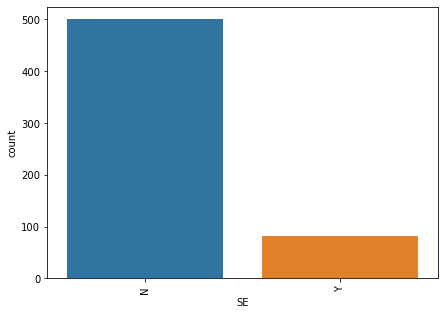

In [45]:
print(data['SE'].value_counts())
plt.figure(figsize=(7,5))
sns.countplot(x=data['SE'])
plt.xticks(rotation=90)
plt.show()

Y    422
N    192
Name: CPL_Status, dtype: int64


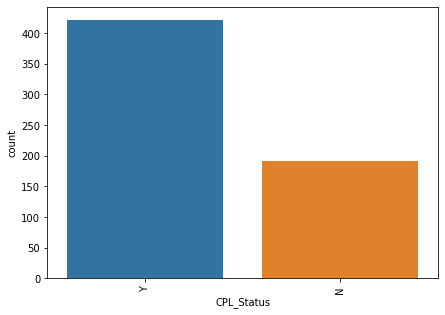

In [46]:
print(data['CPL_Status'].value_counts())
plt.figure(figsize=(7,5))
sns.countplot(x=data['CPL_Status'])
plt.xticks(rotation=90)
plt.show()

# Histogram

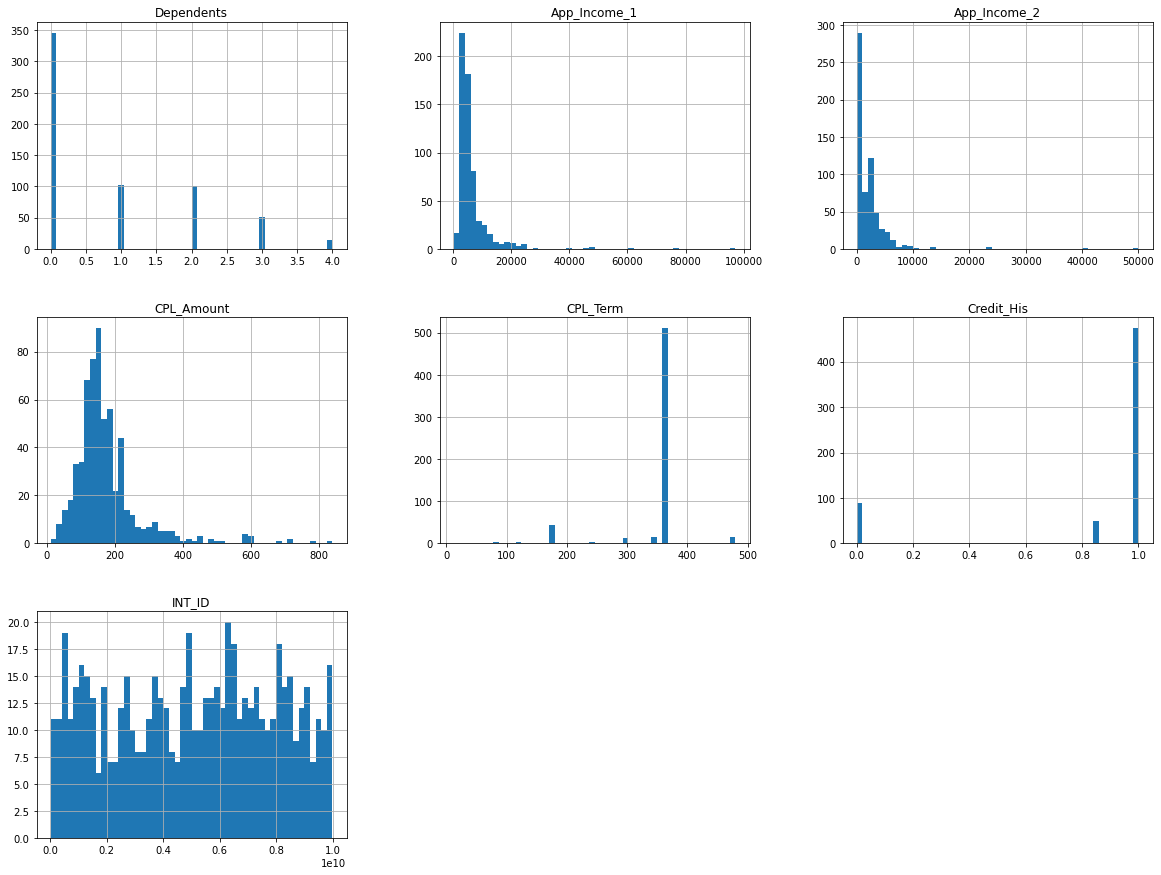

In [47]:
data.hist(bins=50 ,figsize=(20,15))
plt.show()

<AxesSubplot:ylabel='Frequency'>

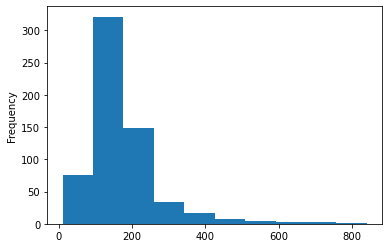

In [48]:
data["CPL_Amount"].plot(kind='hist')

# Distribution Plot

count      614.000000
mean      6484.151140
std       7330.850008
min        180.000000
25%       3453.000000
50%       4575.000000
75%       6954.000000
max      97200.000000
Name: App_Income_1, dtype: float64


<AxesSubplot:ylabel='Density'>

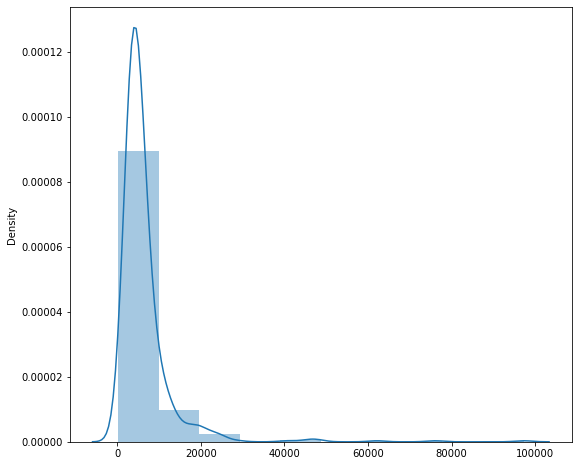

In [49]:
print(data['App_Income_1'].describe())
plt.figure(figsize = (9 , 8))
sns.distplot(x = data['App_Income_1'], bins = 10)

count      614.000000
mean      1945.494958
std       3511.498043
min          0.000000
25%          0.000000
50%       1426.200000
75%       2756.700000
max      50000.400000
Name: App_Income_2, dtype: float64


<AxesSubplot:ylabel='Density'>

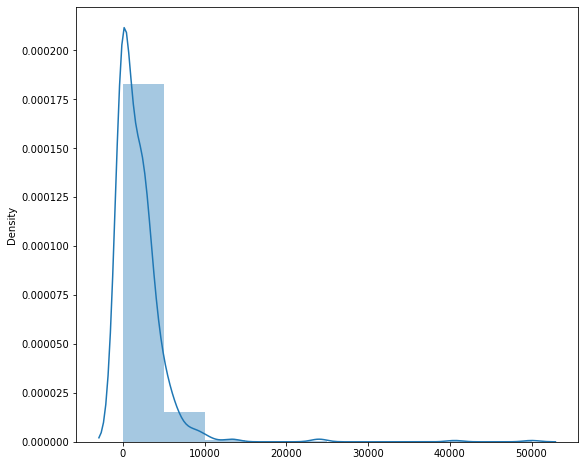

In [50]:
print(data['App_Income_2'].describe())
plt.figure(figsize = (9 , 8))
sns.distplot(x = data['App_Income_2'], bins = 10)

count    614.000000
mean     175.805882
std      102.438603
min       10.800000
25%      120.000000
50%      153.600000
75%      200.100000
max      840.000000
Name: CPL_Amount, dtype: float64


<AxesSubplot:ylabel='Density'>

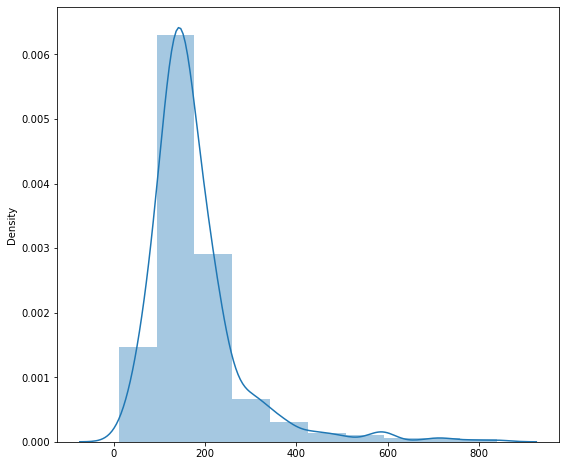

In [51]:
print(data['CPL_Amount'].describe())
plt.figure(figsize = (9 , 8))
sns.distplot(x = data['CPL_Amount'], bins = 10)

count    614.000000
mean     342.000000
std       64.372489
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: CPL_Term, dtype: float64


<AxesSubplot:ylabel='Density'>

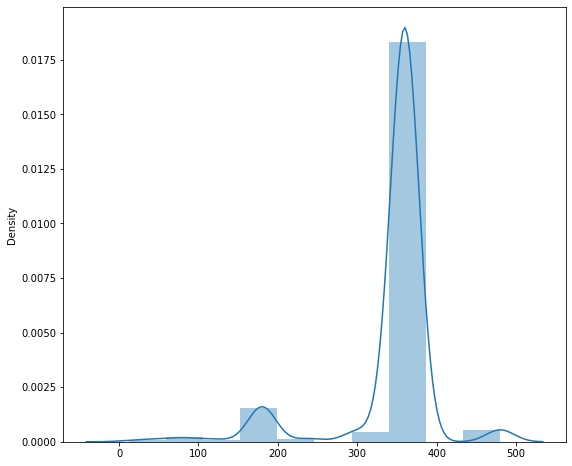

In [52]:
print(data['CPL_Term'].describe())
plt.figure(figsize = (9 , 8))
sns.distplot(x = data['CPL_Term'], bins = 10)

count    614.000000
mean       0.842199
std        0.349681
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_His, dtype: float64


<AxesSubplot:ylabel='Density'>

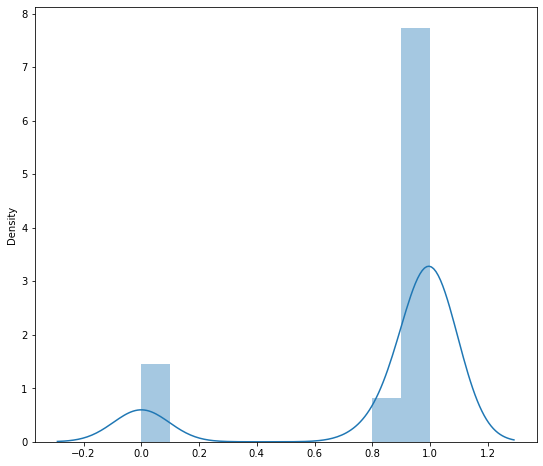

In [53]:
print(data['Credit_His'].describe())
plt.figure(figsize = (9 , 8))
sns.distplot(x = data['Credit_His'], bins = 10)

# Scatter Plot

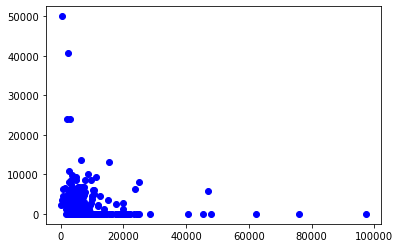

In [54]:
x =data["App_Income_1"] 
y =data["App_Income_2"]
plt.scatter(x, y, c ="blue")
# To show the plot
plt.show()

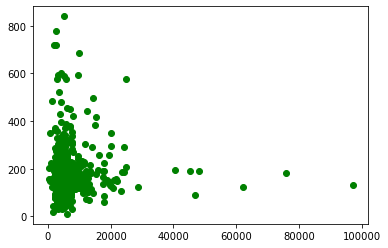

In [55]:
x =data["App_Income_1"] 
  
y =data["CPL_Amount"]
  
plt.scatter(x, y, c ="green")
  
# To show the plot
plt.show()

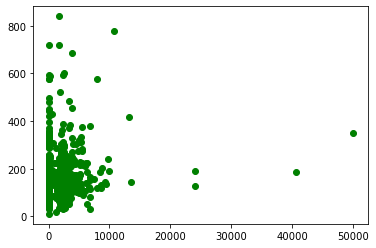

In [56]:
x =data["App_Income_2"] 
  
y =data["CPL_Amount"]
  
plt.scatter(x, y, c ="green")
  
# To show the plot
plt.show()

# Stripplot

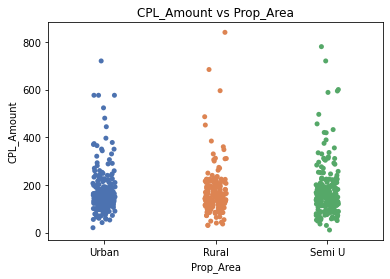

In [57]:
sns.stripplot(data=data, y='CPL_Amount',x='Prop_Area', palette='deep')
plt.title("CPL_Amount vs Prop_Area")
plt.show()

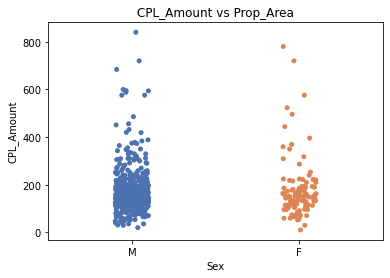

In [58]:
sns.stripplot(data=data, y='CPL_Amount',x='Sex', palette='deep')
plt.title("CPL_Amount vs Prop_Area")
plt.show()

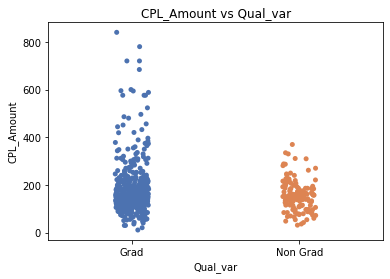

In [59]:
sns.stripplot(data=data, y='CPL_Amount',x='Qual_var', palette='deep')
plt.title("CPL_Amount vs Qual_var")
plt.show()

# Box Plot

<AxesSubplot:xlabel='Sex', ylabel='CPL_Amount'>

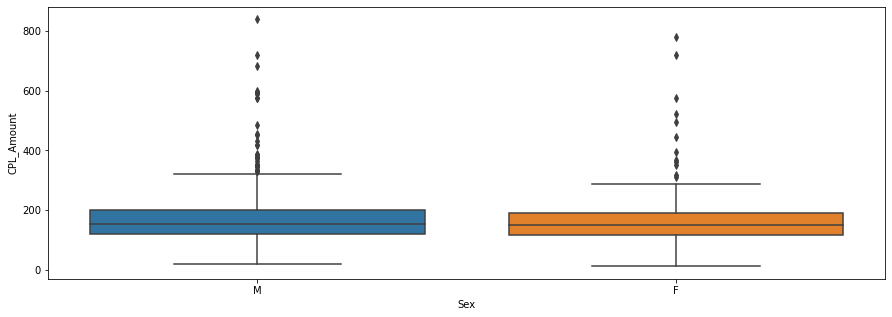

In [60]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Sex',y='CPL_Amount',data=data)

<AxesSubplot:xlabel='Prop_Area', ylabel='CPL_Amount'>

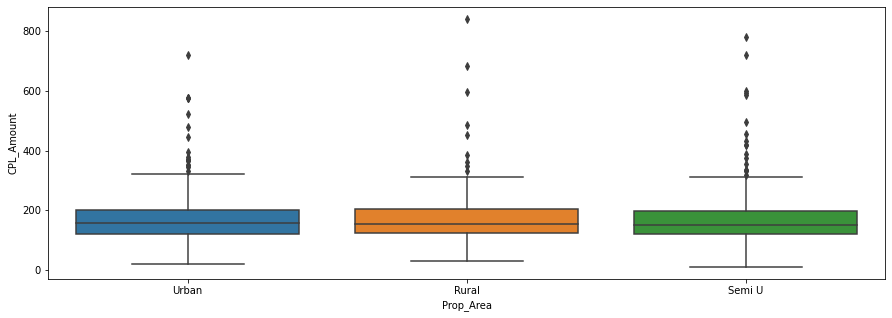

In [61]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Prop_Area',y='CPL_Amount',data=data)

In [62]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Dependents,614.0,8.420195e-01,1.120531e+00,0.0,0.000000e+00,0.000000e+00,2.000000e+00,4.000000e+00
App_Income_1,614.0,6.484151e+03,7.330850e+03,180.0,3.453000e+03,4.575000e+03,6.954000e+03,9.720000e+04
App_Income_2,614.0,1.945495e+03,3.511498e+03,0.0,0.000000e+00,1.426200e+03,2.756700e+03,5.000040e+04
CPL_Amount,614.0,1.758059e+02,1.024386e+02,10.8,1.200000e+02,1.536000e+02,2.001000e+02,8.400000e+02
CPL_Term,614.0,3.420000e+02,6.437249e+01,12.0,3.600000e+02,3.600000e+02,3.600000e+02,4.800000e+02
Credit_His,614.0,8.421986e-01,3.496810e-01,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
INT_ID,614.0,5.055666e+09,2.890445e+09,17886643.0,2.561243e+09,5.244783e+09,7.495052e+09,9.989158e+09


In [63]:
data.ndim

2

In [64]:
data.size

12280

In [65]:
data.min()

Loanapp_ID                                              CPL001002
first_name                                                  Aaron
last_name                                                  Abbott
email                                      aaitchison5o@globo.com
address                                       0 American Ash Lane
Dependents                                                    0.0
Qual_var                                                     Grad
App_Income_1                                                180.0
App_Income_2                                                  0.0
CPL_Amount                                                   10.8
CPL_Term                                                     12.0
Credit_His                                                    0.0
Prop_Area                                                   Rural
INT_ID                                                   17886643
Prev_ID                                               00-160-8837
AGT_ID    

In [66]:
data.max()

Loanapp_ID                                              CPL002990
first_name                                               Zebadiah
last_name                                            des Remedios
email                                          zpriddisde@nyu.edu
address                                            9992 1st Plaza
Dependents                                                    4.0
Qual_var                                                 Non Grad
App_Income_1                                              97200.0
App_Income_2                                              50000.4
CPL_Amount                                                  840.0
CPL_Term                                                    480.0
Credit_His                                                    1.0
Prop_Area                                                   Urban
INT_ID                                                 9989158444
Prev_ID                                               99-947-1131
AGT_ID    

In [67]:
data.isnull().sum()

Loanapp_ID         0
Sex               13
Marital_Status     3
first_name         0
last_name          0
email              0
address            0
Dependents         0
Qual_var           0
SE                32
App_Income_1       0
App_Income_2       0
CPL_Amount         0
CPL_Term           0
Credit_His         0
Prop_Area          0
INT_ID             0
Prev_ID            0
AGT_ID             0
CPL_Status         0
dtype: int64

In [68]:
data.dtypes

Loanapp_ID         object
Sex                object
Marital_Status     object
first_name         object
last_name          object
email              object
address            object
Dependents        float64
Qual_var           object
SE                 object
App_Income_1      float64
App_Income_2      float64
CPL_Amount        float64
CPL_Term          float64
Credit_His        float64
Prop_Area          object
INT_ID              int64
Prev_ID            object
AGT_ID             object
CPL_Status         object
dtype: object

# Extract Derived Features from Data

In [28]:
def drop_column(data,col):
    data.drop(col,axis=1,inplace=True)

In [29]:
drop_column(data,'Loanapp_ID')

In [30]:
drop_column(data,'first_name')

In [31]:
drop_column(data,'last_name')

In [32]:
drop_column(data,'email')

In [33]:
drop_column(data,'address')

In [34]:
drop_column(data,'AGT_ID')

In [35]:
drop_column(data,'Prev_ID')

# Get dummies

    There is no sequenced process or there is a no sequenced relationship that indicates whether a separate 
    categorical variable takes on a specific value. We can create dummy variables in python using 
    get_dummies() method

In [36]:
data.dtypes

Sex                object
Marital_Status     object
Dependents        float64
Qual_var           object
SE                 object
App_Income_1      float64
App_Income_2      float64
CPL_Amount        float64
CPL_Term          float64
Credit_His        float64
Prop_Area          object
INT_ID              int64
CPL_Status         object
dtype: object

In [37]:
data["Qual_var"].unique()

array(['Grad', 'Non Grad'], dtype=object)

In [38]:
Qual_var_Dum = pd.get_dummies(data['Qual_var'],drop_first=True) 

In [39]:
Qual_var_Dum

,Non Grad
0,0
1,0
2,0
3,1
4,0
...,...
609,0
610,0
611,0
612,0


In [40]:
data["Prop_Area"].unique()

array(['Urban', 'Rural', 'Semi U'], dtype=object)

In [41]:
Prop_Area_Dum = pd.get_dummies(data['Prop_Area'],drop_first=True) 

In [42]:
Prop_Area_Dum

,Semi U,Urban
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
609,0,0
610,0,0
611,0,1
612,0,1


In [43]:
merge = pd.concat([data,Prop_Area_Dum,Qual_var_Dum],axis=1)
merge.head(2)

,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,CPL_Status,Semi U,Urban,Non Grad
0,M,N,0.0,Grad,N,7018.8,0.0,175.805882,360.0,1.0,Urban,9694176212,Y,0,1,0
1,M,Y,1.0,Grad,N,5499.6,1809.6,153.600000,360.0,1.0,Rural,152387684,N,0,0,0


# Dropping the duplicate rows

In [44]:
merge.dropna(axis=1,inplace=True)
data.head(1)

,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,CPL_Status
0,M,N,0.0,Grad,N,7018.8,0.0,175.805882,360.0,1.0,Urban,9694176212,Y


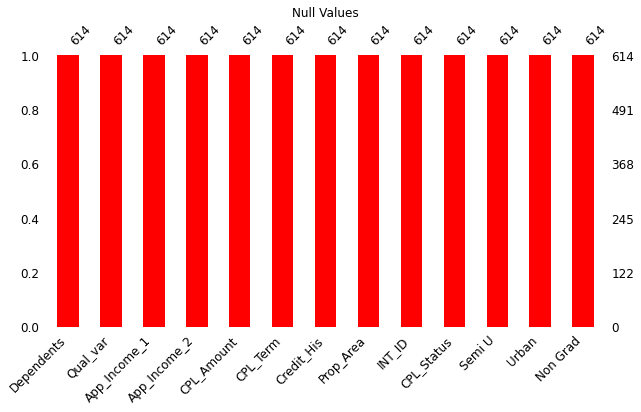

In [45]:
import missingno as no
no.bar(merge,figsize=(10,5), fontsize=12, color='red')
plt.title("Null Values")
plt.show()

In [46]:
drop_column(merge,'Qual_var')

In [47]:
drop_column(merge,'Prop_Area')

In [48]:
drop_column(merge,'INT_ID')

In [49]:
merge.head()

,Dependents,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,CPL_Status,Semi U,Urban,Non Grad
0,0.0,7018.8,0.0,175.805882,360.0,1.0,Y,0,1,0
1,1.0,5499.6,1809.6,153.600000,360.0,1.0,N,0,0,0
2,0.0,3600.0,0.0,79.200000,360.0,1.0,Y,0,1,0
3,0.0,3099.6,2829.6,144.000000,360.0,1.0,Y,0,1,1
4,0.0,7200.0,0.0,169.200000,360.0,1.0,Y,0,1,0


# LabelEncoder

    There is sequenced process or there is a sequenced relationship. it "encode" target labels with value between 0 and n_classes-1. This transformer should be used to encode target values

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
Label_encoder = LabelEncoder()

In [52]:
merge.CPL_Status = Label_encoder.fit_transform(merge.CPL_Status)

In [53]:
merge.CPL_Status.unique()

array([1, 0])

In [54]:
merge.head()

,Dependents,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,CPL_Status,Semi U,Urban,Non Grad
0,0.0,7018.8,0.0,175.805882,360.0,1.0,1,0,1,0
1,1.0,5499.6,1809.6,153.600000,360.0,1.0,0,0,0,0
2,0.0,3600.0,0.0,79.200000,360.0,1.0,1,0,1,0
3,0.0,3099.6,2829.6,144.000000,360.0,1.0,1,0,1,1
4,0.0,7200.0,0.0,169.200000,360.0,1.0,1,0,1,0


# Handle Outliers

# Outlier detection and Outlier imputation if availabale in data

In [96]:
def plot(df,col):
    fig,(ax1,ax2) = plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

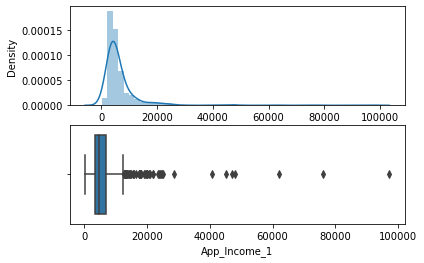

In [97]:
plot(merge,'App_Income_1')

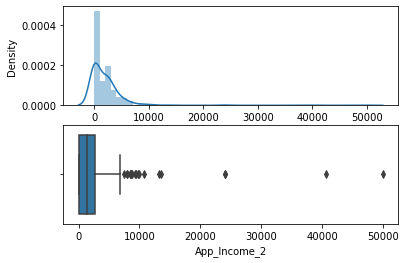

In [98]:
plot(merge,'App_Income_2')

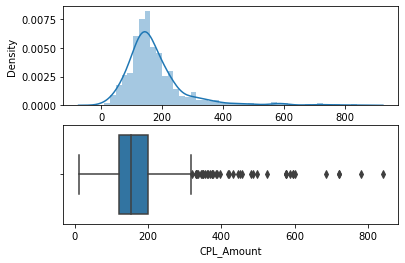

In [99]:
plot(merge,'CPL_Amount')

# Separate out your Independent feature & Dependent feature

In [55]:
x = merge.drop("CPL_Status",axis=1)

In [56]:
y = merge["CPL_Status"]

# Select best Features using Feature Selection Technique

    To Find the best features which will be contribute mst and that will be a good relationship the target varibale

In [102]:
from sklearn.feature_selection import mutual_info_classif

In [103]:
mutual_info_classif(x,y) #Independent variable and dependent variable

# Some kind of important and priority with respective your target variable

array([0.        , 0.00859854, 0.        , 0.00614556, 0.00600379,
       0.13185787, 0.        , 0.00160808, 0.        ])

In [104]:
imp = pd.DataFrame(mutual_info_classif(x,y),index=x.columns)

In [105]:
imp

,0
Dependents,0.018380
App_Income_1,0.005633
App_Income_2,0.011653
CPL_Amount,0.017574
CPL_Term,0.000000
Credit_His,0.167628
Semi U,0.001635
Urban,0.041816
Non Grad,0.000000


In [106]:
imp.columns=['ímportance']
imp.sort_values('ímportance',ascending=True)

,ímportance
CPL_Term,0.000000
Non Grad,0.000000
Semi U,0.001635
App_Income_1,0.005633
App_Income_2,0.011653
CPL_Amount,0.017574
Dependents,0.018380
Urban,0.041816
Credit_His,0.167628


In [107]:
imp.columns=['ímportance']
imp.sort_values('ímportance',ascending=False)

,ímportance
Credit_His,0.167628
Urban,0.041816
Dependents,0.018380
CPL_Amount,0.017574
App_Income_2,0.011653
App_Income_1,0.005633
Semi U,0.001635
CPL_Term,0.000000
Non Grad,0.000000


# Splitting Dataset into Training and Testing set

In [57]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=0)

In [109]:
xtrain.shape

(460, 9)

In [110]:
xtrain.head()

,Dependents,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Semi U,Urban,Non Grad
46,1.0,6778.8,0.0,172.8,360.0,1.0,0,1,0
272,0.0,3399.6,2228.4,134.4,360.0,1.0,0,0,0
474,2.0,6638.4,5577.6,223.2,360.0,1.0,0,0,0
382,0.0,7200.0,0.0,85.2,360.0,1.0,0,1,0
283,0.0,2173.2,1999.2,171.6,360.0,1.0,0,1,0


In [111]:
xtest.shape

(154, 9)

In [112]:
xtest.head()

,Dependents,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Semi U,Urban,Non Grad
454,0.0,8502.0,0.0,194.4,360.0,1.0,1,0,0
52,0.0,5076.0,0.0,160.8,360.0,1.0,1,0,0
536,0.0,7359.6,4687.2,100.8,360.0,1.0,0,1,0
469,0.0,5199.6,2941.2,96.0,360.0,1.0,0,1,0
55,2.0,3249.6,1400.4,115.2,360.0,1.0,1,0,0


In [113]:
ytrain.shape

(460,)

In [114]:
ytrain.head()

46     1
272    1
474    1
382    1
283    1
Name: CPL_Status, dtype: int32

In [115]:
ytest.shape

(154,)

In [116]:
ytest.head()

454    1
52     0
536    1
469    0
55     1
Name: CPL_Status, dtype: int32

# Logistic Regression

    Logistic Regression is a technique applied in ML to classify problems based on the probability concepts. The logistic regression hypothesis limits the cost function between 0 and 1. In logistic regression, the graphs are plotted based on the features or variable used in the dataset. The independent variables are declared in the x-axis and the target or deciding variable is declared in the y-axis. This produces a graph which may be sinusoidal in nature or just a normal linear one

In [62]:
import scikitplot as skplt

In [118]:
from sklearn.linear_model import LogisticRegression
model_log  = LogisticRegression()
model_log.fit(xtrain,ytrain)

LogisticRegression()

In [119]:
y_pred_log = model_log.predict(xtest)

In [120]:
y_pred_log

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [121]:
df1 = pd.DataFrame({"Actual":ytest,"Predicted":y_pred_log})
df1

,Actual,Predicted
454,1,1
52,0,1
536,1,1
469,0,1
55,1,1
...,...,...
399,0,0
89,1,1
271,1,1
563,1,1


In [122]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(ytest, y_pred_log)

array([[ 20,  23],
       [  2, 109]], dtype=int64)

              precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154



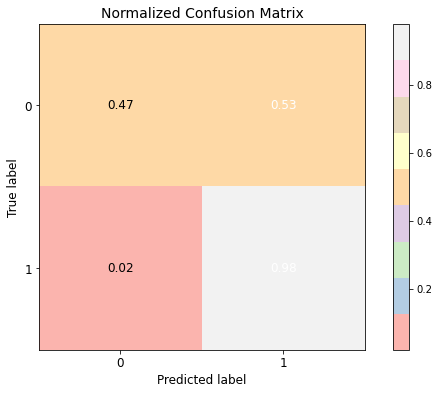

In [123]:
skplt.metrics.plot_confusion_matrix(ytest,y_pred_log,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1,normalize=True)
print(classification_report(ytest, y_pred_log))

In [124]:
y_probas_log = model_log.predict_proba(xtest)
y_probas_log

array([[0.12285395, 0.87714605],
       [0.11811165, 0.88188835],
       [0.33474952, 0.66525048],
       [0.30698016, 0.69301984],
       [0.10218128, 0.89781872],
       [0.81928886, 0.18071114],
       [0.09847694, 0.90152306],
       [0.12699579, 0.87300421],
       [0.83028807, 0.16971193],
       [0.15025741, 0.84974259],
       [0.1162114 , 0.8837886 ],
       [0.10778109, 0.89221891],
       [0.12336911, 0.87663089],
       [0.12398826, 0.87601174],
       [0.13204093, 0.86795907],
       [0.2447603 , 0.7552397 ],
       [0.25194125, 0.74805875],
       [0.1839692 , 0.8160308 ],
       [0.3617211 , 0.6382789 ],
       [0.92253351, 0.07746649],
       [0.88549124, 0.11450876],
       [0.14118035, 0.85881965],
       [0.23243384, 0.76756616],
       [0.33659288, 0.66340712],
       [0.38485749, 0.61514251],
       [0.12433526, 0.87566474],
       [0.16174277, 0.83825723],
       [0.1644419 , 0.8355581 ],
       [0.61213588, 0.38786412],
       [0.65687436, 0.34312564],
       [0.

In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred_log)

0.8376623376623377

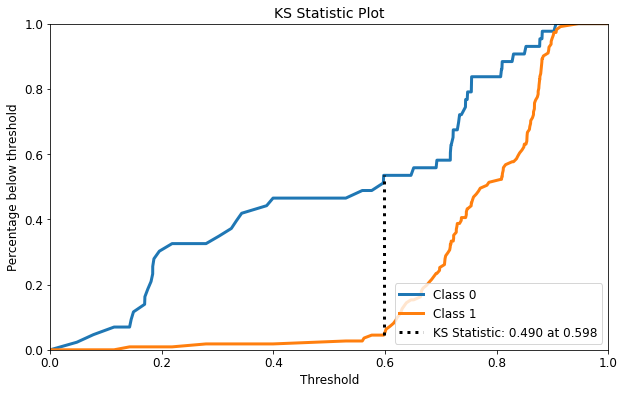

In [126]:
skplt.metrics.plot_ks_statistic(ytest,y_probas_log,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

<AxesSubplot:ylabel='Density'>

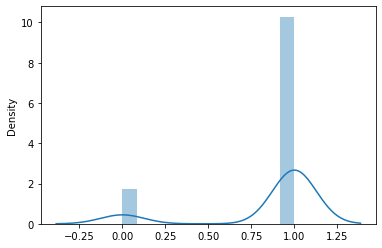

In [127]:
sns.distplot(y_pred_log)

# Support Vector Machine Model

    Support Vector Machine (SVM) is a supervised machine learning algorithm capable of performing classification, regression and even outlier detection. The linear SVM classifier works by drawing a straight line between two classes. 

In [128]:
from sklearn.svm import SVC

In [129]:
model_svc = SVC(probability=True)

In [130]:
model_svc.fit(xtrain,ytrain)

SVC(probability=True)

In [131]:
y_pred_svc = model_svc.predict(xtest)
y_pred_svc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [132]:
model_svc.score(xtest,y_pred_svc)

1.0

In [133]:
df1 = pd.DataFrame({"Actual":ytest,"Predicted":y_pred_svc})
df1

,Actual,Predicted
454,1,1
52,0,1
536,1,1
469,0,1
55,1,1
...,...,...
399,0,1
89,1,1
271,1,1
563,1,1


In [134]:
y_probas_svc = model_svc.predict_proba(xtest)
y_probas_svc

array([[0.3285693 , 0.6714307 ],
       [0.32859123, 0.67140877],
       [0.32784661, 0.67215339],
       [0.32860406, 0.67139594],
       [0.32858895, 0.67141105],
       [0.3287579 , 0.6712421 ],
       [0.32860742, 0.67139258],
       [0.32845933, 0.67154067],
       [0.32857458, 0.67142542],
       [0.32868798, 0.67131202],
       [0.32849408, 0.67150592],
       [0.32848678, 0.67151322],
       [0.32859919, 0.67140081],
       [0.32861456, 0.67138544],
       [0.32861283, 0.67138717],
       [0.32857928, 0.67142072],
       [0.32859568, 0.67140432],
       [0.32854621, 0.67145379],
       [0.32839394, 0.67160606],
       [0.32860615, 0.67139385],
       [0.32877977, 0.67122023],
       [0.32860491, 0.67139509],
       [0.328554  , 0.671446  ],
       [0.3257984 , 0.6742016 ],
       [0.32858489, 0.67141511],
       [0.32846117, 0.67153883],
       [0.32886011, 0.67113989],
       [0.32675338, 0.67324662],
       [0.32861699, 0.67138301],
       [0.32853664, 0.67146336],
       [0.

In [135]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, y_pred_svc)

array([[  0,  43],
       [  0, 111]], dtype=int64)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.72      1.00      0.84       111

    accuracy                           0.72       154
   macro avg       0.36      0.50      0.42       154
weighted avg       0.52      0.72      0.60       154



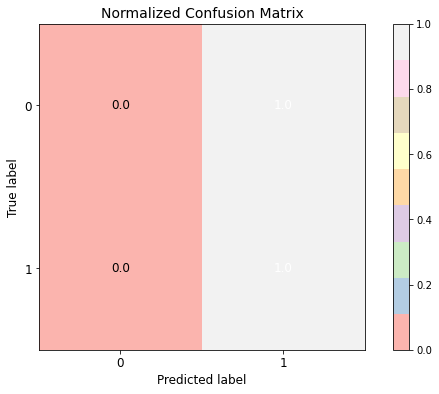

In [136]:
skplt.metrics.plot_confusion_matrix(ytest,y_pred_svc,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1,normalize=True)
print(classification_report(ytest, y_pred_svc))

In [137]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred_svc)

0.7207792207792207

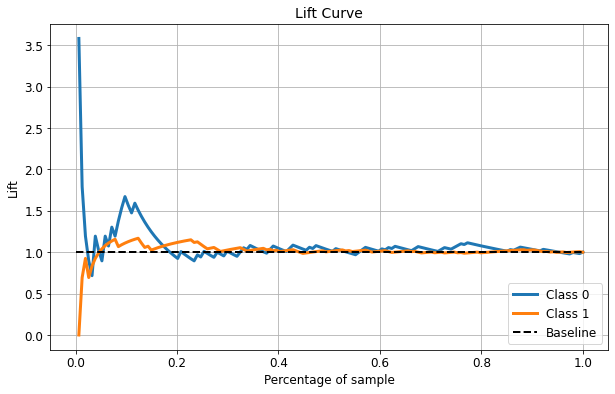

In [138]:
skplt.metrics.plot_lift_curve(ytest,y_probas_svc,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

<AxesSubplot:ylabel='Density'>

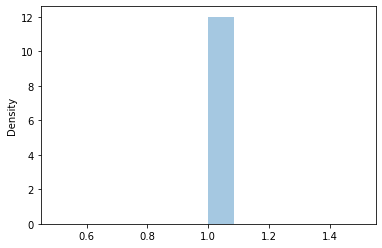

In [139]:
sns.distplot(y_pred_svc)

# DecisionTreeClassifier

    Decision Tree algorithm is an algorithm in supervised learning. This algorithm can be used for solving both classification and regression problems unlike other supervised learning algorithms. The main aim of this tree is that it can create training models which will then be used to predict class or value of target variables by learning decision rules inferred from training data. The understanding level of this algorithm is so easy compared to other classification algorithms. Using tree representation, this algorithm tries to solve the problem. The tree contains internal nodes which correspond to an attribute and leaf nodes which correspond to a class label. So, for predicting a class label for a record, the process starts from the root of the tree, then the values of the root attribute are compared with the values of the record’s attribute and finally on the basis of comparison, the branch corresponding to that value is followed and then jumped to the next node

In [140]:
from sklearn.tree import DecisionTreeClassifier

In [141]:
clf = DecisionTreeClassifier()

In [142]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [143]:
y_pred_dec = clf.predict(xtest)

In [144]:
y_pred_dec

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [145]:
df1 = pd.DataFrame({"Actual":ytest,"Predicted":y_pred_dec})
df1

,Actual,Predicted
454,1,1
52,0,1
536,1,0
469,0,0
55,1,1
...,...,...
399,0,0
89,1,1
271,1,1
563,1,1


In [146]:
y_probas_dec = clf.predict_proba(xtest)

In [147]:
y_probas_dec

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [148]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, y_pred_dec)

array([[25, 18],
       [24, 87]], dtype=int64)

              precision    recall  f1-score   support

           0       0.51      0.58      0.54        43
           1       0.83      0.78      0.81       111

    accuracy                           0.73       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.74      0.73      0.73       154



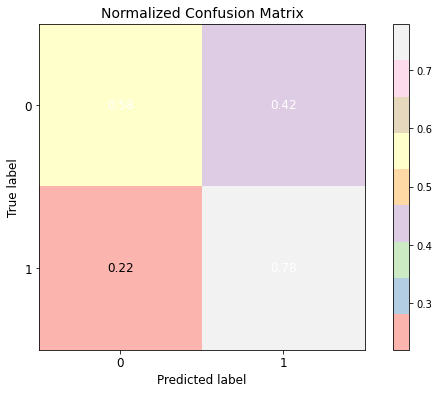

In [149]:
skplt.metrics.plot_confusion_matrix(ytest,y_pred_dec,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1,normalize=True)
print(classification_report(ytest, y_pred_dec))

In [150]:
print("Accuracy = ",accuracy_score(ytest,y_pred_dec))

Accuracy =  0.7272727272727273


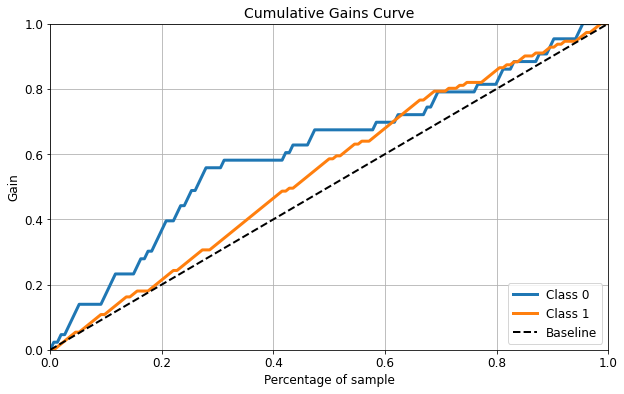

In [151]:
skplt.metrics.plot_cumulative_gain(ytest,y_probas_dec,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

<AxesSubplot:ylabel='Density'>

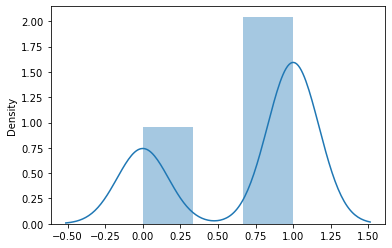

In [152]:
sns.distplot(y_pred_dec)

[Text(679.4762097104058, 4410.789473684211, 'X[5] <= 0.421\ngini = 0.438\nsamples = 460\nvalue = [149, 311]'),
 Text(194.76439790575915, 4172.368421052632, 'X[1] <= 5179.8\ngini = 0.136\nsamples = 68\nvalue = [63, 5]'),
 Text(146.07329842931938, 3933.9473684210525, 'gini = 0.0\nsamples = 36\nvalue = [36, 0]'),
 Text(243.45549738219893, 3933.9473684210525, 'X[1] <= 5920.8\ngini = 0.264\nsamples = 32\nvalue = [27, 5]'),
 Text(146.07329842931938, 3695.5263157894738, 'X[3] <= 192.0\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(97.38219895287958, 3457.1052631578946, 'X[6] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(48.69109947643979, 3218.684210526316, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(146.07329842931938, 3218.684210526316, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(194.76439790575915, 3457.1052631578946, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(340.83769633507853, 3695.5263157894738, 'X[6] <= 0.5\ngini = 0.142\nsamples = 26\nvalue = [24, 2

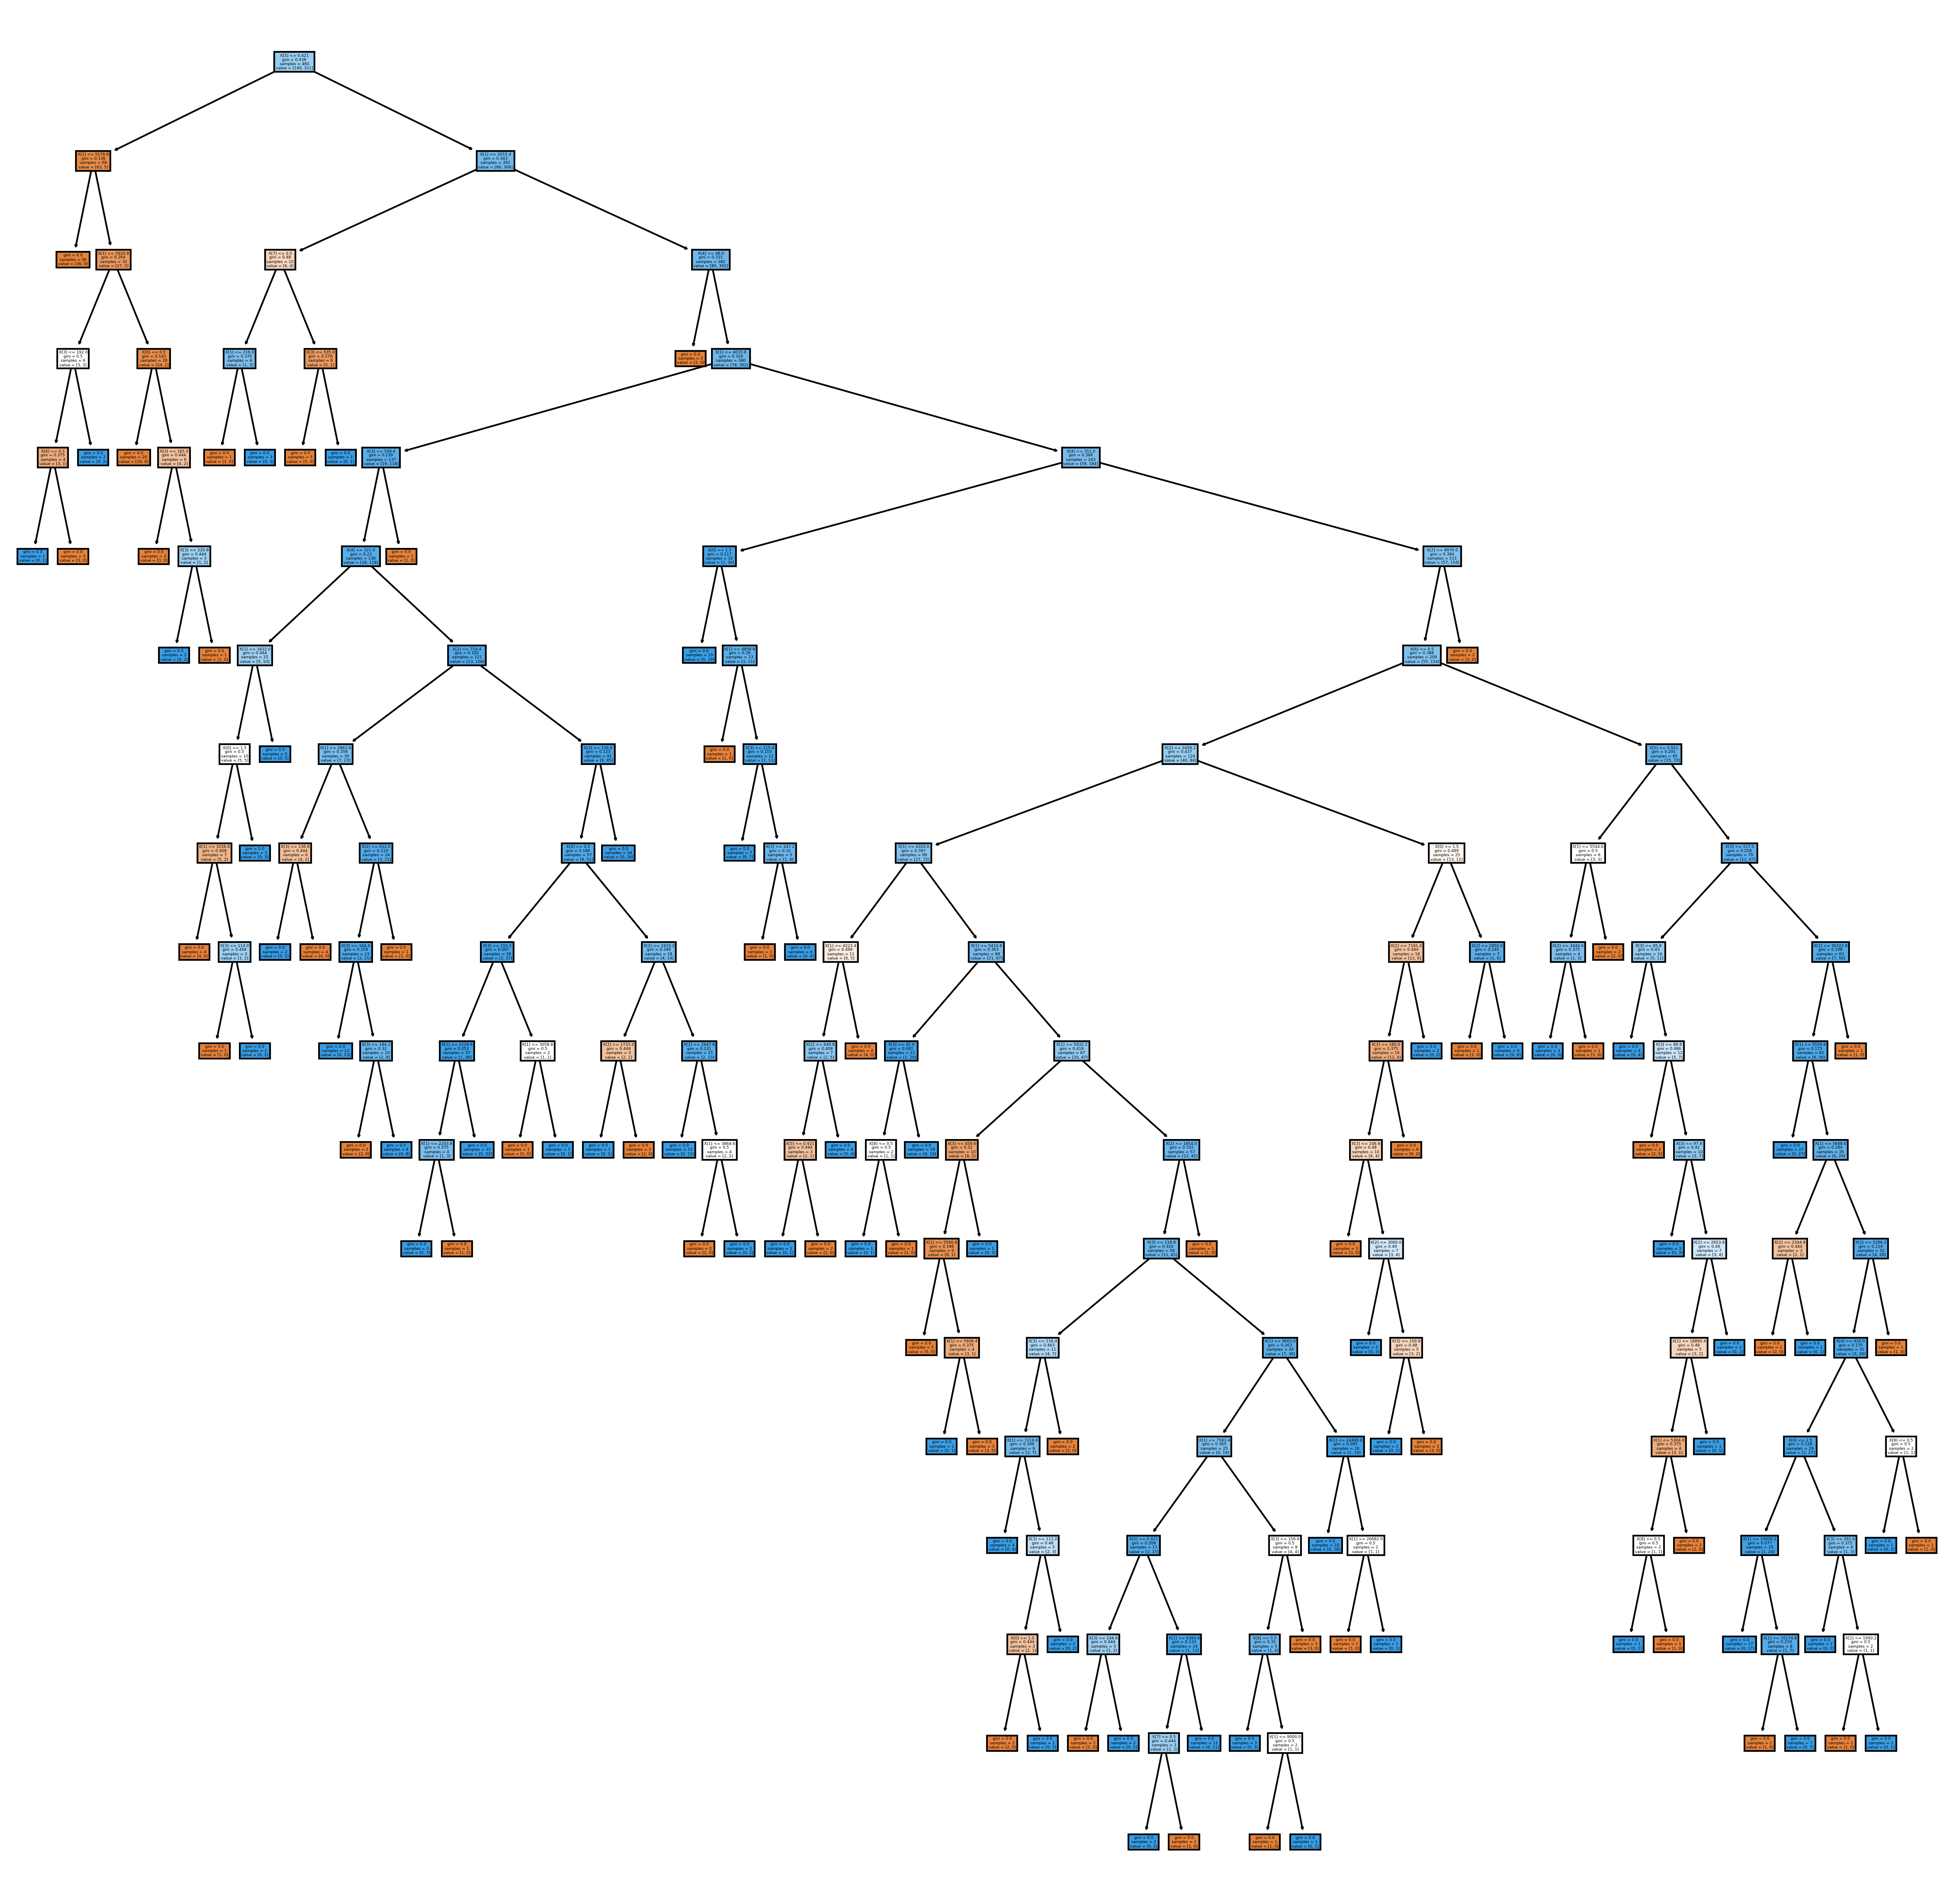

In [153]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=300)
tree.plot_tree(clf,filled=True)

In [154]:
text_represent = tree.export_text(clf)
text_represent

'|--- feature_5 <= 0.42\n|   |--- feature_1 <= 5179.80\n|   |   |--- class: 0\n|   |--- feature_1 >  5179.80\n|   |   |--- feature_1 <= 5920.80\n|   |   |   |--- feature_3 <= 192.00\n|   |   |   |   |--- feature_6 <= 0.50\n|   |   |   |   |   |--- class: 1\n|   |   |   |   |--- feature_6 >  0.50\n|   |   |   |   |   |--- class: 0\n|   |   |   |--- feature_3 >  192.00\n|   |   |   |   |--- class: 1\n|   |   |--- feature_1 >  5920.80\n|   |   |   |--- feature_6 <= 0.50\n|   |   |   |   |--- class: 0\n|   |   |   |--- feature_6 >  0.50\n|   |   |   |   |--- feature_3 <= 165.00\n|   |   |   |   |   |--- class: 0\n|   |   |   |   |--- feature_3 >  165.00\n|   |   |   |   |   |--- feature_3 <= 220.80\n|   |   |   |   |   |   |--- class: 1\n|   |   |   |   |   |--- feature_3 >  220.80\n|   |   |   |   |   |   |--- class: 0\n|--- feature_5 >  0.42\n|   |--- feature_1 <= 2015.40\n|   |   |--- feature_7 <= 0.50\n|   |   |   |--- feature_1 <= 216.00\n|   |   |   |   |--- class: 0\n|   |   |   |--

In [155]:
plt.savefig('trees.png',format='png',bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

# K-Nearest Neighbor Algorithm

    K – Nearest Neighbor (KNN) algorithm is a supervised machine learning algorithm which can be easily implemented and also can be used to solve both classification and regression problems. This algorithm assumes that similar things exist in close proximity or in other words near to each other. KNN captures this idea with some mathematics learned by everyone in childhood for calculating the distance between points on a graph. This idea is about similarity which can also be called distance, proximity or closeness. The distance can be calculated in other ways also and depending on the problem to be solved, any one of the ways can be adopted. One of the most known and familiar choices is the calculation of the straight-line distance which is called Euclidean distance

# K Neighbors Classifier

    The k-Nearest-Neighbor Classifier (kNN) works directly on the learned samples, instead of creating rules compared to other classification methods

In [156]:
from sklearn.neighbors import KNeighborsClassifier
knc =KNeighborsClassifier(n_neighbors=2)
knc = clf.fit(xtrain, ytrain)
print('Accuracy:', knc.score(xtest, ytest)*100)

Accuracy: 72.07792207792207


In [157]:
y_pred_train_knc = knc.predict(xtrain) 
y_pred_train_knc

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,

In [158]:
y_pred_knc = knc.predict(xtest)

In [159]:
y_pred_knc

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [160]:
df1 = pd.DataFrame({"Actual":ytest,"Predicted":y_pred_knc})
df1

,Actual,Predicted
454,1,1
52,0,1
536,1,0
469,0,0
55,1,0
...,...,...
399,0,0
89,1,1
271,1,1
563,1,1


In [161]:
y_probas_knc = knc.predict_proba(xtest)

In [162]:
y_probas_knc

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [163]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, y_pred_knc)

array([[24, 19],
       [24, 87]], dtype=int64)

              precision    recall  f1-score   support

           0       0.50      0.56      0.53        43
           1       0.82      0.78      0.80       111

    accuracy                           0.72       154
   macro avg       0.66      0.67      0.66       154
weighted avg       0.73      0.72      0.73       154



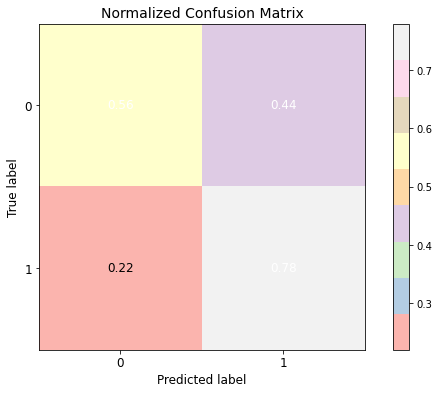

In [164]:
skplt.metrics.plot_confusion_matrix(ytest,y_pred_knc,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1,normalize=True)
print(classification_report(ytest, y_pred_knc))

<AxesSubplot:ylabel='Density'>

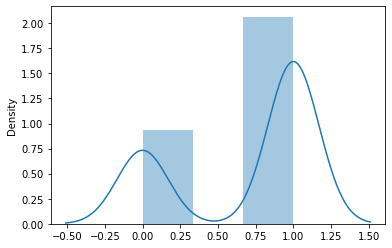

In [165]:
sns.distplot(y_pred_knc)

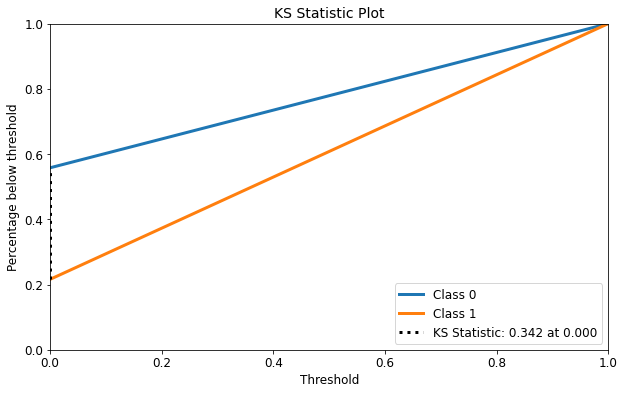

In [166]:
skplt.metrics.plot_ks_statistic(ytest,y_probas_knc,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

# Naive Bayes Classifier

    Naive Bayes classifiers are a collection of classification algorithms based on Bayes' Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other

In [167]:
from sklearn.naive_bayes import MultinomialNB

In [168]:
nomial = MultinomialNB().fit(xtrain,ytrain)

In [169]:
y_pred_nomial = nomial.predict(xtest)

In [170]:
y_pred_nomial

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0])

In [171]:
df = pd.DataFrame({'Actual':ytest,'Predict':y_pred_nomial})

In [172]:
df.head()

,Actual,Predict
454,1,1
52,0,1
536,1,0
469,0,0
55,1,0


Accuracy score

In [173]:
print("Training Data Set Accuracy: ", accuracy_score(ytest,y_pred_nomial))

Training Data Set Accuracy:  0.474025974025974


Confusion matrix

In [174]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,y_pred_nomial)

In [175]:
cm

array([[22, 21],
       [60, 51]], dtype=int64)

# Gaussian Naive Bayes Classifier

    Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. ... Naive Bayes are a group of supervised machine learning classification algorithms based on the Bayes theorem. It is a simple classification technique, but has high functionality

In [66]:
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, f1_score

In [177]:
from sklearn.naive_bayes import GaussianNB

In [178]:
gnb_clf=GaussianNB()
gnb_clf.fit(xtrain, ytrain)

GaussianNB()

In [179]:
y_pred_Gaussian = gnb_clf.predict(xtest)
y_pred_Gaussian

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [180]:
df1 = pd.DataFrame({'Actual':ytest,'Predict':y_pred_Gaussian})

In [181]:
df1

,Actual,Predict
454,1,1
52,0,1
536,1,1
469,0,1
55,1,1
...,...,...
399,0,0
89,1,1
271,1,1
563,1,1


Accuracy score

In [182]:
print("Accuracy Score :",accuracy_score(ytest,y_pred_Gaussian))

Accuracy Score : 0.8246753246753247


Confusion matrix

In [183]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,y_pred_Gaussian)
cm

array([[ 20,  23],
       [  4, 107]], dtype=int64)

Recall Score

In [184]:
print("Recall Score",recall_score(ytest,y_pred_Gaussian))

Recall Score 0.963963963963964


Precision Score

In [185]:
print("Precision Score :",precision_score(ytest,y_pred_Gaussian))

Precision Score : 0.823076923076923


F1 Score

In [186]:
print("F1 Score :",f1_score(ytest,y_pred_Gaussian))

F1 Score : 0.8879668049792531


# Bernoulli Naive Bayes Classifier

    Bernoulli Naive Bayes is a variant of Naive Bayes. ... Naive Bayes classifier is a probabilistic classifier which means that given an input, it predicts the probability of the input being classified for all the classes. It is also called conditional probability.

In [58]:
from sklearn.naive_bayes import BernoulliNB
bnb_clf=BernoulliNB()
bnb_clf.fit(xtrain, ytrain)

BernoulliNB()

In [59]:
y_pred_bnb = bnb_clf.predict(xtest)
y_pred_bnb

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [60]:
df1 = pd.DataFrame({'Actual':ytest,'Predict':y_pred_bnb})
df1

,Actual,Predict
454,1,1
52,0,1
536,1,1
469,0,1
55,1,1
...,...,...
399,0,0
89,1,1
271,1,1
563,1,1


Accuracy Score

In [63]:
from sklearn.metrics import accuracy_score
print("Accuracy Score :",accuracy_score(ytest,y_pred_bnb))

Accuracy Score : 0.8311688311688312


Confusion_matrix

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,y_pred_bnb)
cm

array([[ 19,  24],
       [  2, 109]], dtype=int64)

Precision Score

In [67]:
print("Precision Score :",precision_score(ytest,y_pred_bnb))

Precision Score : 0.8195488721804511


F1 Score

In [68]:
print("F1 Score :",f1_score(ytest,y_pred_bnb))

F1 Score : 0.8934426229508197


              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



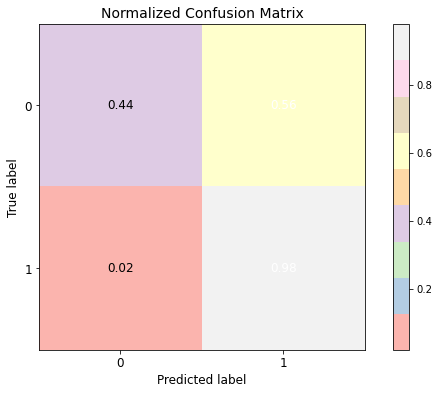

In [70]:
skplt.metrics.plot_confusion_matrix(ytest,y_pred_bnb,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1,normalize=True)
print(classification_report(ytest, y_pred_bnb))

<AxesSubplot:ylabel='Density'>

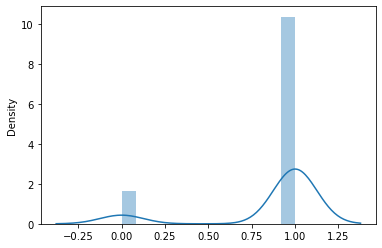

In [71]:
sns.distplot(y_pred_bnb)

# Random Forest Classifier

    Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

In [194]:
from sklearn.ensemble import RandomForestClassifier
model_rand = RandomForestClassifier()
model_rand = model_rand.fit(xtrain, ytrain)

In [195]:
y_pred_rand = model_rand.predict(xtest)

In [196]:
y_pred_rand 

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [197]:
df1 = pd.DataFrame({"Actual":ytest,"Predicted":y_pred_rand})
df1

,Actual,Predicted
454,1,1
52,0,1
536,1,1
469,0,1
55,1,1
...,...,...
399,0,0
89,1,1
271,1,1
563,1,1


Accuracy score

In [198]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred_rand)

0.7922077922077922

Confusion_matrix

In [199]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(ytest,y_pred_rand)

In [200]:
cm

array([[ 21,  22],
       [ 10, 101]], dtype=int64)

              precision    recall  f1-score   support

           0       0.68      0.49      0.57        43
           1       0.82      0.91      0.86       111

    accuracy                           0.79       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.78      0.79      0.78       154



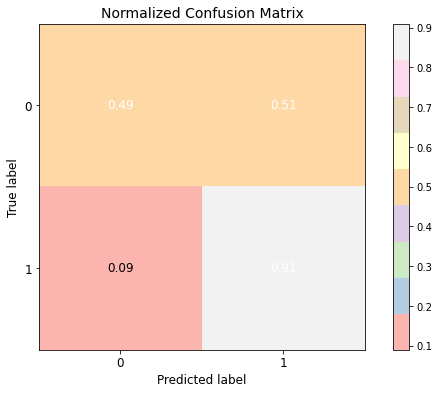

In [201]:
skplt.metrics.plot_confusion_matrix(ytest,y_pred_rand,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1,normalize=True)
print(classification_report(ytest, y_pred_rand))

In [202]:
y_probas_rand = model_rand.predict_proba(xtest)
y_probas_rand

array([[0.29, 0.71],
       [0.04, 0.96],
       [0.38, 0.62],
       [0.36, 0.64],
       [0.09, 0.91],
       [0.96, 0.04],
       [0.23, 0.77],
       [0.47, 0.53],
       [0.92, 0.08],
       [0.18, 0.82],
       [0.03, 0.97],
       [0.19, 0.81],
       [0.48, 0.52],
       [0.15, 0.85],
       [0.13, 0.87],
       [0.22, 0.78],
       [0.14, 0.86],
       [0.25, 0.75],
       [0.17, 0.83],
       [0.95, 0.05],
       [0.97, 0.03],
       [0.14, 0.86],
       [0.13, 0.87],
       [0.21, 0.79],
       [0.33, 0.67],
       [0.17, 0.83],
       [0.22, 0.78],
       [0.2 , 0.8 ],
       [0.91, 0.09],
       [0.86, 0.14],
       [0.41, 0.59],
       [0.56, 0.44],
       [0.19, 0.81],
       [0.53, 0.47],
       [0.39, 0.61],
       [0.87, 0.13],
       [0.11, 0.89],
       [0.42, 0.58],
       [0.11, 0.89],
       [0.07, 0.93],
       [0.13, 0.87],
       [0.82, 0.18],
       [0.52, 0.48],
       [0.25, 0.75],
       [0.03, 0.97],
       [0.48, 0.52],
       [0.23, 0.77],
       [0.24,

<AxesSubplot:ylabel='Density'>

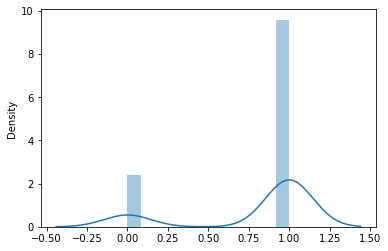

In [203]:
sns.distplot(y_pred_rand)

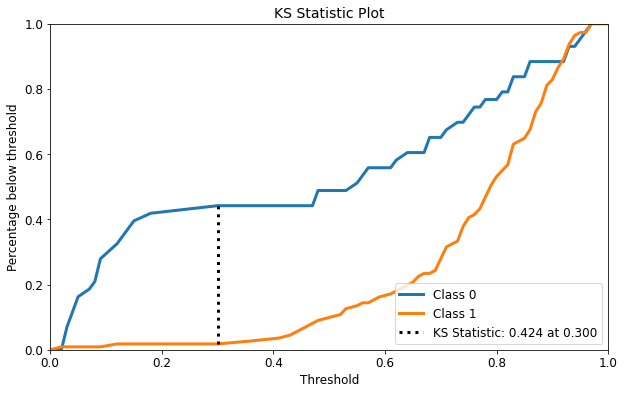

In [204]:
skplt.metrics.plot_ks_statistic(ytest,y_probas_rand,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

# BaggingClassifier

    A Bagging classifier. A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

In [205]:
from sklearn.ensemble import BaggingClassifier

In [206]:
model_bag = BaggingClassifier()

In [207]:
model_bag.fit(xtrain,ytrain)

BaggingClassifier()

In [208]:
y_pred_bag = model_bag.predict(xtest)

In [209]:
y_pred_bag

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [210]:
df1 = pd.DataFrame({"Actual":ytest,"Predicted":y_pred_bag})
df1

,Actual,Predicted
454,1,1
52,0,1
536,1,1
469,0,1
55,1,1
...,...,...
399,0,0
89,1,1
271,1,1
563,1,1


Accuracy score

In [211]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred_bag)

0.7792207792207793

Confusion_matrix

In [212]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(ytest,y_pred_bag)
cm

array([[26, 17],
       [17, 94]], dtype=int64)

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        43
           1       0.85      0.85      0.85       111

    accuracy                           0.78       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.78      0.78      0.78       154



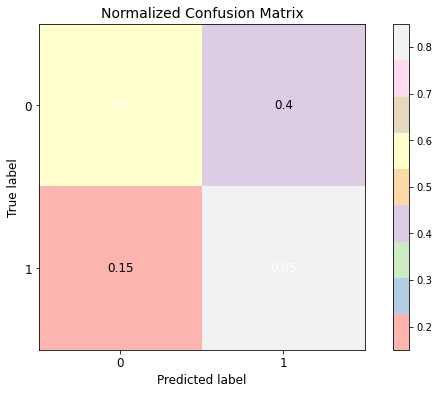

In [213]:
skplt.metrics.plot_confusion_matrix(ytest,y_pred_bag,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1,normalize=True)
print(classification_report(ytest, y_pred_bag))

In [214]:
y_probas_bag = model_bag.predict_proba(xtest)
y_probas_bag

array([[0.1, 0.9],
       [0. , 1. ],
       [0.3, 0.7],
       [0.2, 0.8],
       [0.1, 0.9],
       [1. , 0. ],
       [0.3, 0.7],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.3, 0.7],
       [0.2, 0.8],
       [0.1, 0.9],
       [0.5, 0.5],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.1, 0.9],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.1, 0.9],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [0.2, 0.8],
       [0.3, 0.7],
       [0.5, 0.5],
       [0. , 1. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.1, 0.9],
       [0.7, 0.3],
       [0.4, 0.6],
       [1. , 0. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.1, 0.9],
       [0.1, 0.9],
       [0.9, 0.1],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.1, 0.9],
       [0.5, 0.5],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.2, 0.8],
       [0. , 1. ],
       [0.6, 0.4],
       [0.1,

<AxesSubplot:ylabel='Density'>

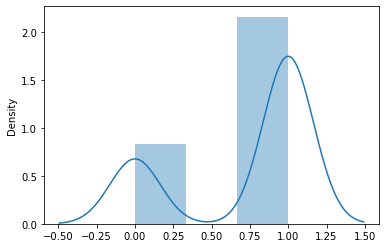

In [215]:
sns.distplot(y_pred_bag)

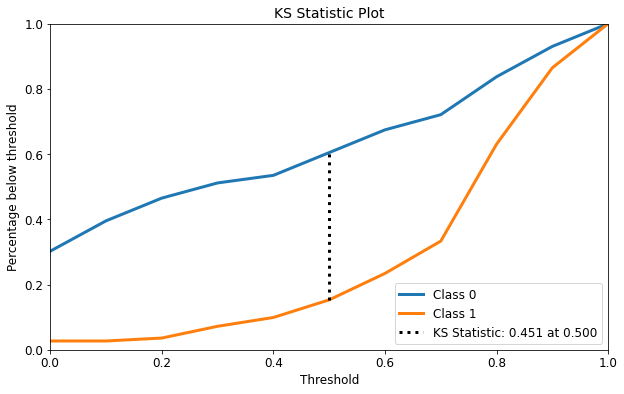

In [216]:
skplt.metrics.plot_ks_statistic(ytest,y_probas_bag,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

# AdaBoostClassifier

    An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases

In [217]:
from sklearn.ensemble import AdaBoostClassifier

In [218]:
model_ada = AdaBoostClassifier(n_estimators=100)

In [219]:
model_ada.fit(xtrain,ytrain)

AdaBoostClassifier(n_estimators=100)

In [220]:
y_pred_ada = model_ada.predict(xtest)
y_pred_ada

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [221]:
df1 = pd.DataFrame({"Actual":ytest,"Predicted":y_pred_ada})
df1

,Actual,Predicted
454,1,1
52,0,1
536,1,1
469,0,1
55,1,1
...,...,...
399,0,0
89,1,1
271,1,1
563,1,1


Accuracy Score

In [222]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred_ada)

0.8116883116883117

Confusion matrix

In [223]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(ytest,y_pred_ada)
cm

array([[ 21,  22],
       [  7, 104]], dtype=int64)

              precision    recall  f1-score   support

           0       0.75      0.49      0.59        43
           1       0.83      0.94      0.88       111

    accuracy                           0.81       154
   macro avg       0.79      0.71      0.73       154
weighted avg       0.80      0.81      0.80       154



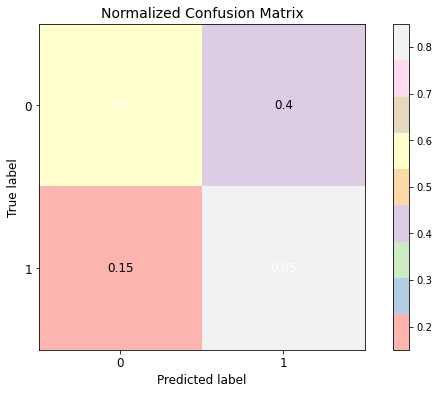

In [224]:
skplt.metrics.plot_confusion_matrix(ytest,y_pred_bag,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1,normalize=True)
print(classification_report(ytest, y_pred_ada))

In [225]:
y_probas_ada = model_ada.predict_proba(xtest)
y_probas_ada

array([[0.49604965, 0.50395035],
       [0.49523023, 0.50476977],
       [0.49974237, 0.50025763],
       [0.4940658 , 0.5059342 ],
       [0.49248245, 0.50751755],
       [0.50949217, 0.49050783],
       [0.49860236, 0.50139764],
       [0.49682551, 0.50317449],
       [0.50915316, 0.49084684],
       [0.49125756, 0.50874244],
       [0.49410142, 0.50589858],
       [0.49475085, 0.50524915],
       [0.49505006, 0.50494994],
       [0.49444783, 0.50555217],
       [0.49722032, 0.50277968],
       [0.49407815, 0.50592185],
       [0.49463373, 0.50536627],
       [0.50368054, 0.49631946],
       [0.49587562, 0.50412438],
       [0.51063906, 0.48936094],
       [0.50891825, 0.49108175],
       [0.49473607, 0.50526393],
       [0.49698609, 0.50301391],
       [0.4945537 , 0.5054463 ],
       [0.49724789, 0.50275211],
       [0.49678016, 0.50321984],
       [0.49494902, 0.50505098],
       [0.4872167 , 0.5127833 ],
       [0.50508357, 0.49491643],
       [0.46446762, 0.53553238],
       [0.

<AxesSubplot:ylabel='Density'>

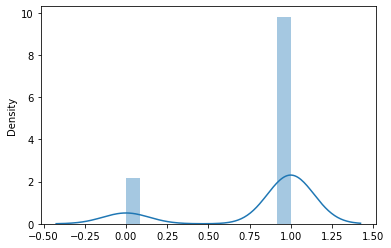

In [226]:
sns.distplot(y_pred_ada)

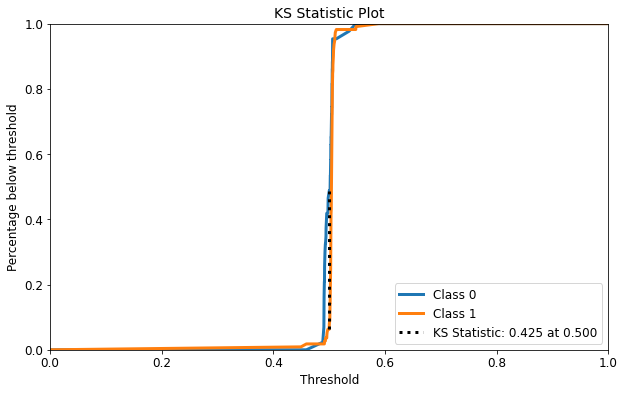

In [227]:
skplt.metrics.plot_ks_statistic(ytest,y_probas_ada,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

# ExtraTreesClassifier

    ExtraTreesClassifier is an ensemble learning method fundamentally based on decision trees. ExtraTreesClassifier, like RandomForest, randomizes certain decisions and subsets of data to minimize over-learning from the data and overfitting

In [228]:
from sklearn.ensemble import ExtraTreesClassifier
Ext = ExtraTreesClassifier().fit(x, y)

In [229]:
y_pred_Ext = Ext.predict(xtest)
y_pred_Ext

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [230]:
df1 = pd.DataFrame({"Actual":ytest,"Predicted":y_pred_Ext})
df1

,Actual,Predicted
454,1,1
52,0,0
536,1,1
469,0,0
55,1,1
...,...,...
399,0,0
89,1,1
271,1,1
563,1,1


Accuracy score

In [231]:
print("Training Data Set Accuracy: ", accuracy_score(ytest,y_pred_Ext))

Training Data Set Accuracy:  1.0


Confusion matrix

In [232]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(ytest,y_pred_Ext)
cm

array([[ 43,   0],
       [  0, 111]], dtype=int64)

Cross Validation Score

In [233]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Ext, x, y, cv=5)
scores.mean()

0.7556710649073703

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00       111

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



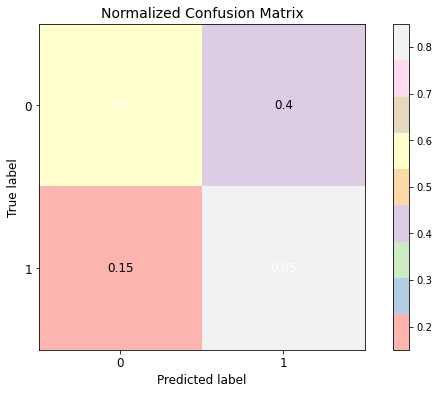

In [234]:
skplt.metrics.plot_confusion_matrix(ytest,y_pred_bag,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1,normalize=True)
print(classification_report(ytest, y_pred_Ext))

In [235]:
y_probas_Ext = Ext.predict_proba(xtest)
y_probas_Ext

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

<AxesSubplot:ylabel='Density'>

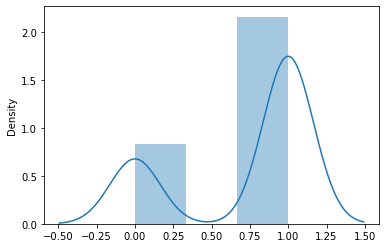

In [236]:
sns.distplot(y_pred_Ext)

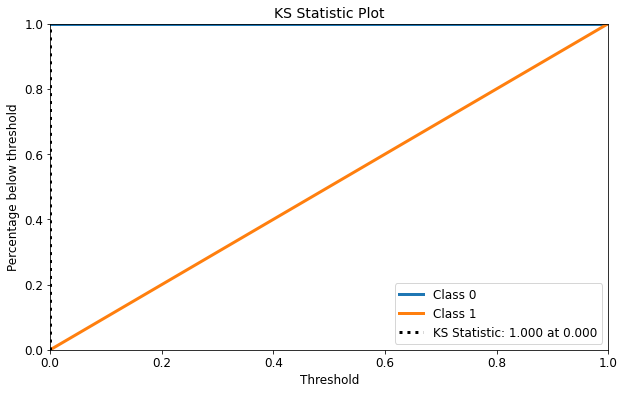

In [237]:
skplt.metrics.plot_ks_statistic(ytest,y_probas_Ext,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

# Categorical Naive Bayes Classifier

    The categorical Naive Bayes classifier is suitable for classification with discrete features that are categorically distributed. The categories of each feature are drawn from a categorical distribution. Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).

In [238]:
from sklearn.naive_bayes import CategoricalNB
cb_clf=CategoricalNB()
cb_clf.fit(xtrain, ytrain)

CategoricalNB()

In [239]:
y_pred_cb = cb_clf.predict(xtest)
y_pred_cb

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [240]:
df1 = pd.DataFrame({"Actual":ytest,"Predicted":y_pred_cb})
df1

,Actual,Predicted
454,1,1
52,0,1
536,1,1
469,0,1
55,1,1
...,...,...
399,0,1
89,1,1
271,1,1
563,1,1


Accuracy Score

In [241]:
print("Accuracy Score :",accuracy_score(ytest,y_pred_cb))

Accuracy Score : 0.7337662337662337


Confusion Matrix

In [242]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(ytest,y_pred_cb)
cm

array([[  7,  36],
       [  5, 106]], dtype=int64)

              precision    recall  f1-score   support

           0       0.58      0.16      0.25        43
           1       0.75      0.95      0.84       111

    accuracy                           0.73       154
   macro avg       0.66      0.56      0.55       154
weighted avg       0.70      0.73      0.68       154



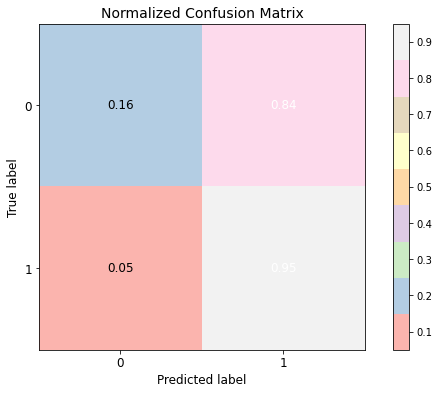

In [243]:
skplt.metrics.plot_confusion_matrix(ytest,y_pred_cb,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1,normalize=True)
print(classification_report(ytest, y_pred_cb))

In [244]:
y_probas_cb = Ext.predict_proba(xtest)
y_probas_cb

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

<AxesSubplot:ylabel='Density'>

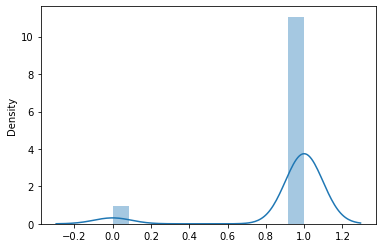

In [245]:
sns.distplot(y_pred_cb)

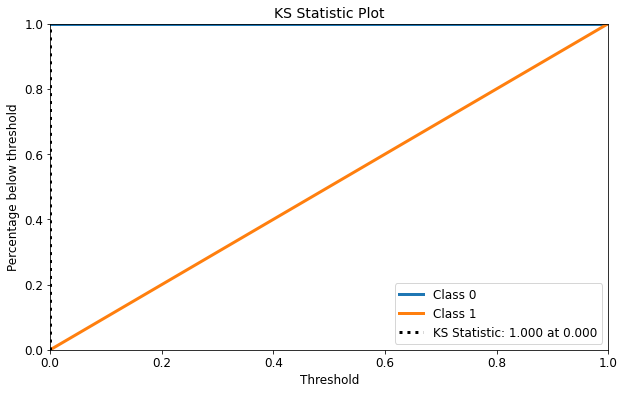

In [246]:
skplt.metrics.plot_ks_statistic(ytest,y_probas_cb,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

# GradientBoostingClassifier

    Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting

In [247]:
from sklearn.ensemble import GradientBoostingClassifier
GR = GradientBoostingClassifier().fit(x, y)

In [248]:
y_pred_GR = GR.predict(xtest)
y_pred_GR

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [249]:
df_GR = pd.DataFrame({"Actual":ytest,"Predicted":y_pred_GR})
df_GR

,Actual,Predicted
454,1,1
52,0,1
536,1,1
469,0,1
55,1,1
...,...,...
399,0,0
89,1,1
271,1,1
563,1,1


In [250]:
df_GR.columns

Index(['Actual', 'Predicted'], dtype='object')

Accuracy Score

In [251]:
print("Accuracy Score :",accuracy_score(ytest,y_pred_GR))

Accuracy Score : 0.8961038961038961


Confusion Matrix

In [252]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(ytest,y_pred_GR)
cm

array([[ 28,  15],
       [  1, 110]], dtype=int64)

Recall Score

In [253]:
print("Recall Score",recall_score(ytest,y_pred_GR))

Recall Score 0.990990990990991


Precision Score

In [254]:
print("Precision Score :",precision_score(ytest,y_pred_GR))

Precision Score : 0.88


F1 Score

In [255]:
print("F1 Score :",f1_score(ytest,y_pred_GR))

F1 Score : 0.9322033898305084


              precision    recall  f1-score   support

           0       0.97      0.65      0.78        43
           1       0.88      0.99      0.93       111

    accuracy                           0.90       154
   macro avg       0.92      0.82      0.85       154
weighted avg       0.90      0.90      0.89       154



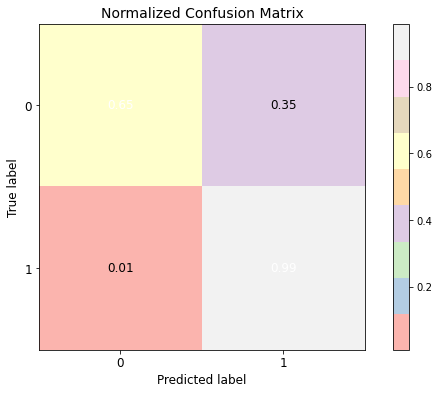

In [256]:
skplt.metrics.plot_confusion_matrix(ytest,y_pred_GR,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1,normalize=True)
print(classification_report(ytest, y_pred_GR))

In [257]:
y_probas_GR = GR.predict_proba(xtest)
y_probas_GR

array([[0.1172875 , 0.8827125 ],
       [0.16516452, 0.83483548],
       [0.30528633, 0.69471367],
       [0.34671363, 0.65328637],
       [0.04276598, 0.95723402],
       [0.89685437, 0.10314563],
       [0.17849085, 0.82150915],
       [0.14752252, 0.85247748],
       [0.90926981, 0.09073019],
       [0.06406256, 0.93593744],
       [0.11465763, 0.88534237],
       [0.13752867, 0.86247133],
       [0.13444633, 0.86555367],
       [0.10435608, 0.89564392],
       [0.11042979, 0.88957021],
       [0.29428781, 0.70571219],
       [0.24479428, 0.75520572],
       [0.08052089, 0.91947911],
       [0.22356714, 0.77643286],
       [0.93337403, 0.06662597],
       [0.95193713, 0.04806287],
       [0.06711376, 0.93288624],
       [0.18473788, 0.81526212],
       [0.10846919, 0.89153081],
       [0.17050887, 0.82949113],
       [0.14622076, 0.85377924],
       [0.13047991, 0.86952009],
       [0.11280047, 0.88719953],
       [0.97055185, 0.02944815],
       [0.96042313, 0.03957687],
       [0.

<AxesSubplot:ylabel='Density'>

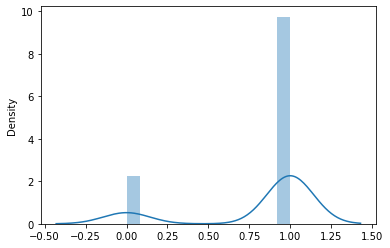

In [258]:
sns.distplot(y_pred_GR)

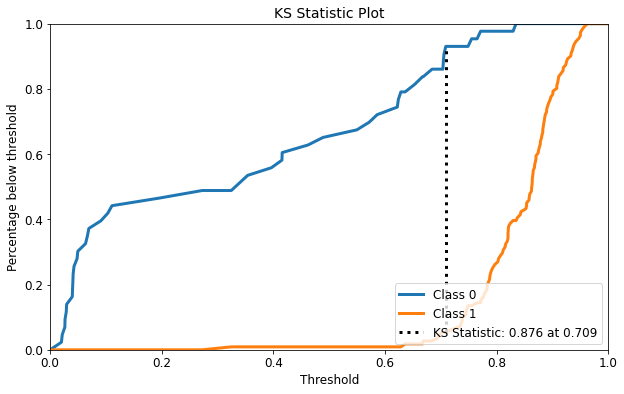

In [259]:
skplt.metrics.plot_ks_statistic(ytest,y_probas_GR,figsize=(10,6),title_fontsize=14,text_fontsize=12)
plt.show()

# TO CHECK THE CPL_STATUS WHETHER YES OR NO

In [261]:
x = [[1.0,6778.8,0.0,172.8,360.0,1.0,0,1,0]]
y_pred_GR = GR.predict(xtest) 
if (y_pred_GR[0]==1):
    print("YES")
else:
    print("NO")

YES


In [267]:
x = [[0.0,1800.0,2160.0,132.000000,360.0,0.000000,0,1,0,0]]
y_pred_GR = GR.predict(xtest) 
if (y_pred_GR[0]==0):
    print("YES")
else:
    print("NO")

NO


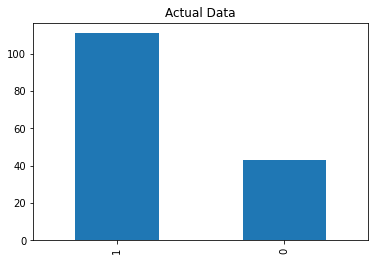

In [291]:
x=df_GR['Actual'].value_counts()
x.plot.bar()
plt.title('Actual Data')
plt.show()

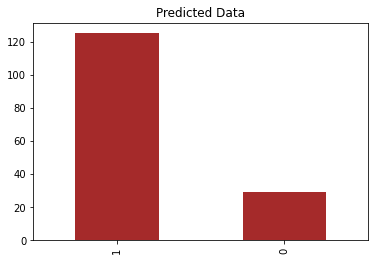

In [279]:
x=df_GR['Predicted'].value_counts()
x.plot.bar(color='brown')
plt.title('Predicted Data')
plt.show()